In [1]:
import warnings
warnings.filterwarnings('ignore')

# necessary packages
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

# additional certain short functions
from torch import is_tensor
from matplotlib.pyplot import pause
from random import randint
from copy import deepcopy
from math import floor, ceil
from torch import stack
from torch import cat

ground truth =  Dress
Dataset size =  60000


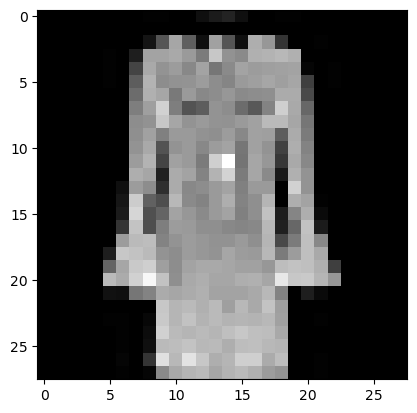

In [2]:
# get training dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# get testing dataset
testing_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

# class names
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

# print random item to visualize
rand = random.randint(0, 59999)
img = training_data.data[rand]
plt.imshow(img, cmap='gray')
print("ground truth = ", training_data.classes[training_data.targets[rand]])

# print dataset size 
size = len(training_data)
print("Dataset size = ", size)

In [12]:
# object picking
def pick(dataset: datasets, name: list, number: int) -> list:
    i = 0
    counter = [0] * len(name)
    score = []
    while True:
        if dataset.classes[dataset.targets[i]] in name and \
            counter[name.index(dataset.classes[dataset.targets[i]])] < number:
                if score == []:
                    score = dataset.data[i].reshape(1, 28, 28)
                else:
                    score = cat((score, dataset.data[i].reshape(1, 28, 28)), dim=0)
                counter[name.index(dataset.classes[dataset.targets[i]])] += 1
        i += 1
        correct = 0
        for j in range(len(name)):
            if counter[j] == number:
                correct += 1
        if correct == len(name):
            return score
        
# sequential album extension
def album(dataset: datasets, is_rand_stride: bool, is_rand_pos: bool) -> torch.Tensor:
    expansion = []      # list after expanded
    temp = []           # list after every movement
    stride = 5          # default stride
    pos = [14, 27]      # default starting position
    num_list = [0] * len(dataset)   # record number of each album
    
    # expand and clean
    for i in range(len(dataset)):
        if i == 0:
            expansion = dataset[i].repeat(3, 4).reshape(1, 28*3, 28*4)
        else:
            buffer = dataset[i].repeat(3, 4).reshape(1, 28*3, 28*4)
            expansion = cat((expansion, buffer), dim=0)
        expansion[i][:, 28:] = 0
        expansion[i][28:, :] = 0
    expansion = torch.tensor(expansion, dtype=torch.float32)
    print("expansion size =", expansion.shape)
    
    # random stride
    for i in range(len(num_list)):
        # define stride value
        if is_rand_stride == True: stride = randint(3, 7)
        # album generation
        first_frame = deepcopy(expansion[i])
        next_frame = deepcopy(expansion[i])
        y = deepcopy(expansion[i])
        for j in range(floor((112-28)/stride)):
            # moving part (1-dim only)
            for z in range(28):
                next_frame[:, 28+stride*(j+1)-(z+1)] = next_frame[:, 28+stride*j-(z+1)]
            next_frame[:, :stride*(j+1)+1] = 0  # clean other area
            # sequencing part
            if j == 0: y = stack((first_frame, next_frame)) 
            else: y = cat((y, next_frame.reshape(1, 28*3, 28*4)), dim=0)
        # record number
        num_list[i] = len(y)
        # sequencing part
        if i == 0: temp = y
        else: temp = cat((temp, y), dim=0)

    # random position
    for i in range(len(num_list)):
        # define position value
        if is_rand_pos == True: pos = [randint(14, 27), randint(27, 28*3-1)]    # [col, row]
        stride = floor((112-28)/num_list[i])    # re-inference stride value
        # parallel movement
        for j in range(num_list[i]):
            for k in range(28):
                for l in range(28):
                    temp[sum(num_list[:i])+j][pos[1]-k][pos[0]+stride*j-l] = \
                        temp[sum(num_list[:i])+j][27-k][27+stride*j-l]
            # clean other area
            temp[sum(num_list[:i])+j][:pos[1]-28+1, :] = 0
            temp[sum(num_list[:i])+j][:, pos[0]+stride*j+1:] = 0
    
    # fatch up last frames
    # TO BE DONE!! (補齊後面帧數)
    
    score = temp
    print("score shape =", score.shape)
    print("numbers of each album =", num_list)
        
    return score, num_list

In [204]:
# references usage
y_moved = deepcopy(y)
rand_x = randint(14, 27)
rand_y = randint(27, 28*3-1)
print("new start position [x, y] = [", rand_x,",", rand_y, "]")

# all frames move left parellel
for i in range(floor((112-28)/stride)+1):    # len of per list
   for j in range(28):
      for k in range(28):
         y_moved[i][rand_y-j][rand_x+stride*i-k] = y_moved[i][27-j][27+stride*i-k]
   
   # clean other area
   y_moved[i][:rand_y-28+1, :] = 0
   y_moved[i][:, rand_x+stride*i+1:] = 0
   
   # show info
   plt.imshow(y_moved[i], cmap='gray')
   pause(0.01)

NameError: name 'y' is not defined

In [13]:
dataset = training_data
name = [
    "Shirt",
    "Sneaker",
]
number = 20

test = pick(dataset, name, number)
test, num_list = album(test, is_rand_stride = True, is_rand_pos = False)
print(len(num_list))
print(sum(num_list[:2]))

# for i in range (number*len(name)):
#     plt.imshow(test[i], cmap='gray')
#     pause(0.1)

expansion size = torch.Size([40, 84, 112])
score shape = torch.Size([783, 84, 112])
numbers of each album = [29, 29, 13, 13, 17, 15, 13, 22, 15, 17, 17, 13, 22, 17, 17, 29, 15, 29, 13, 17, 17, 22, 29, 17, 13, 22, 29, 17, 29, 17, 29, 17, 22, 15, 13, 13, 29, 29, 15, 17]
40
58


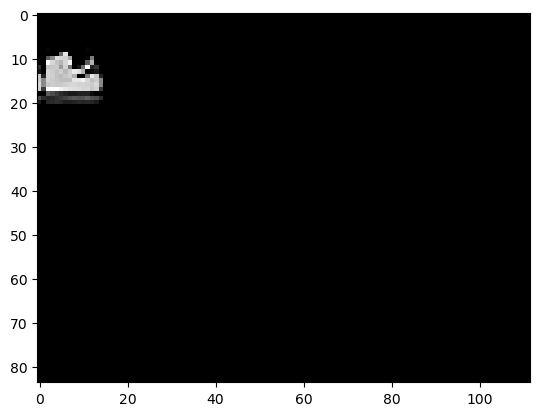

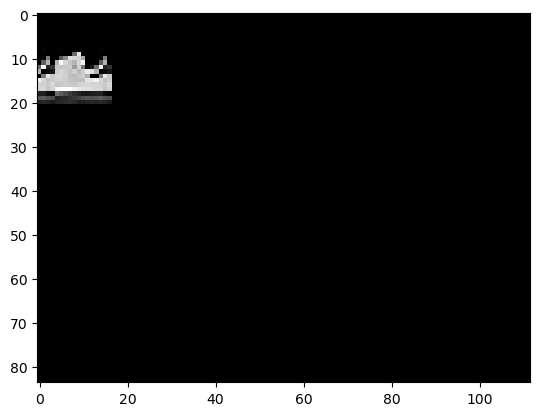

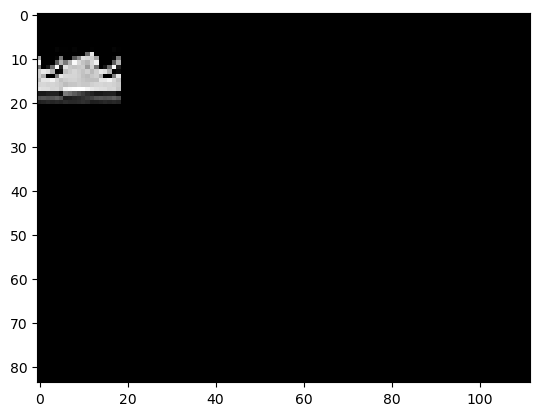

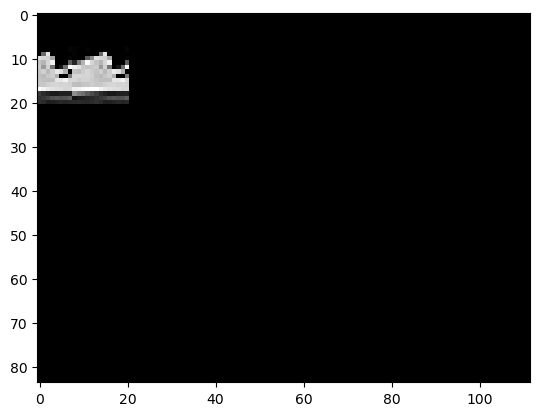

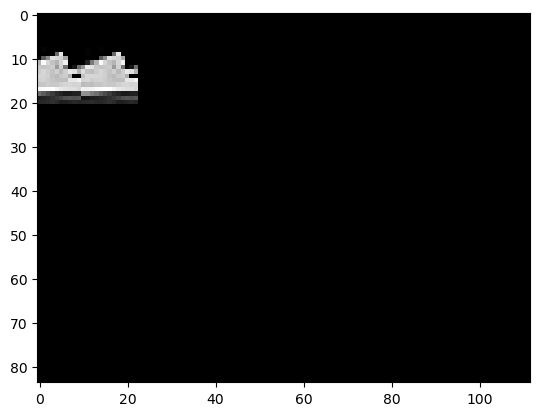

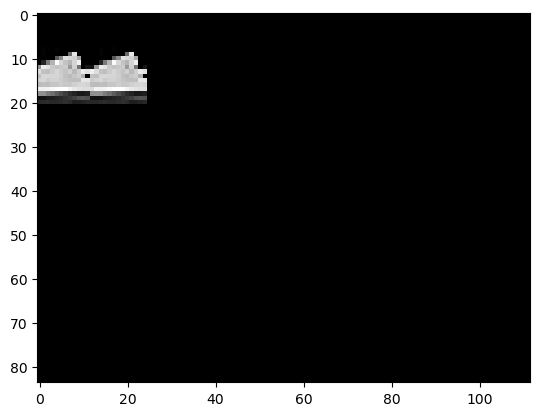

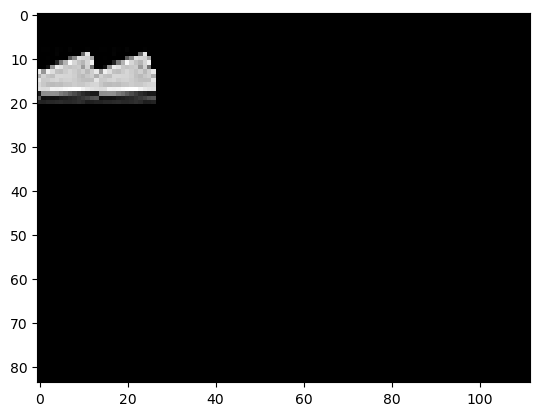

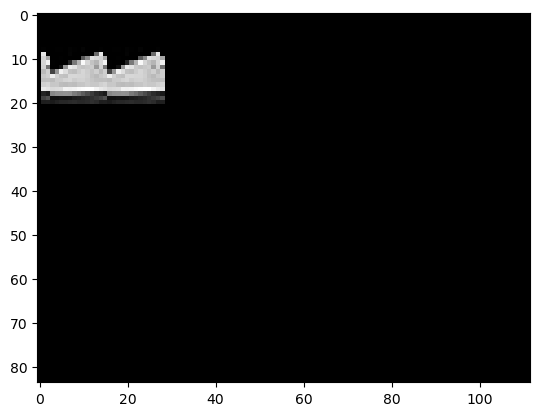

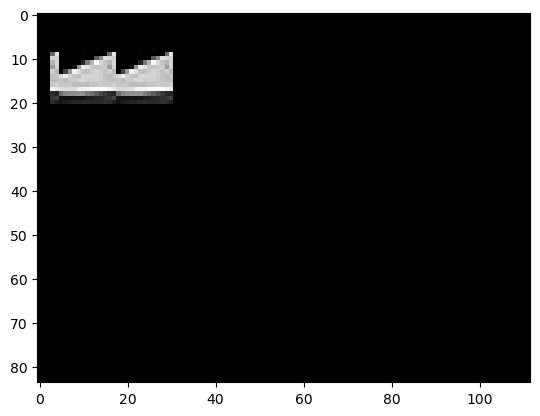

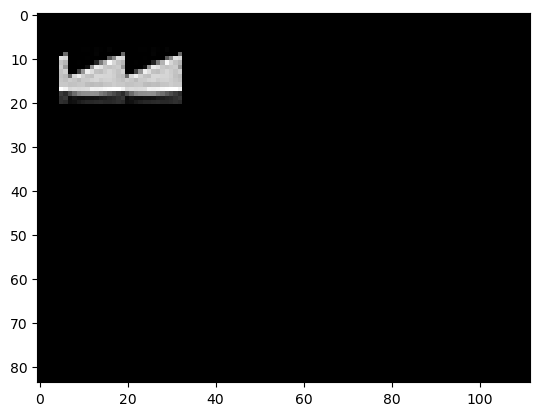

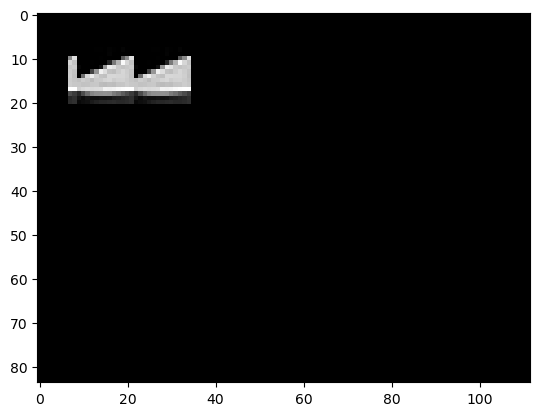

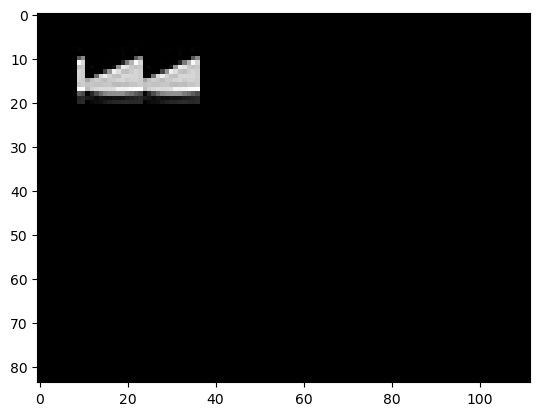

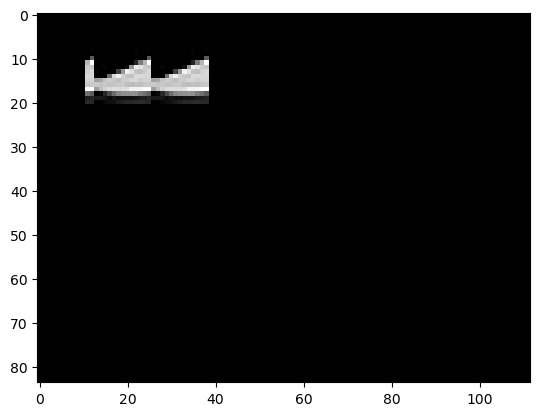

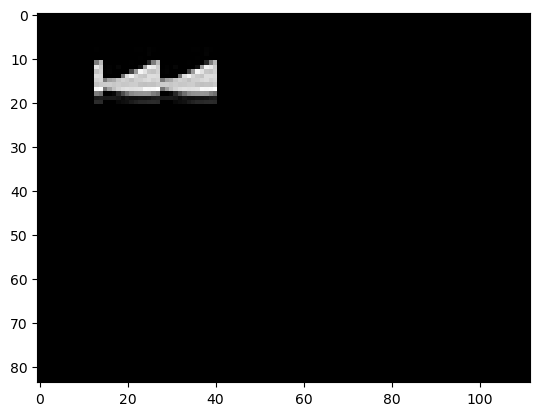

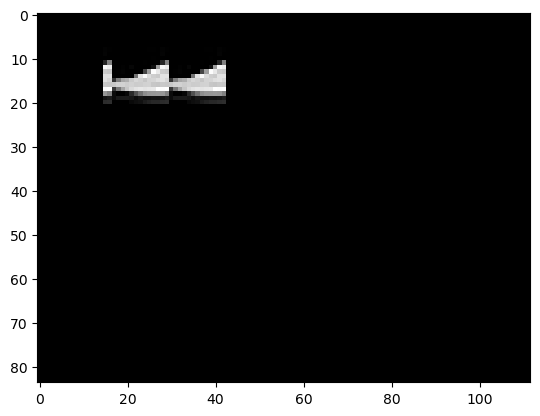

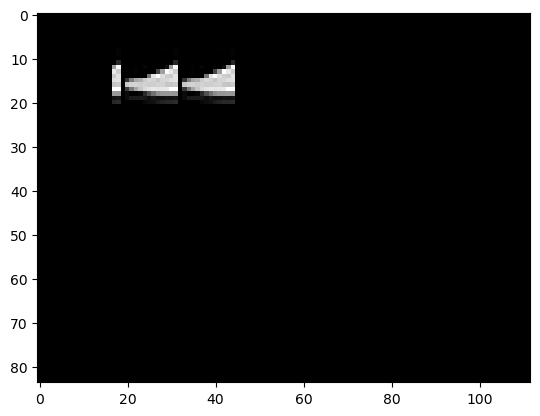

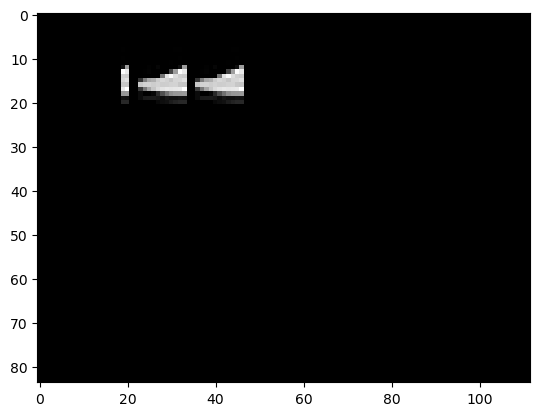

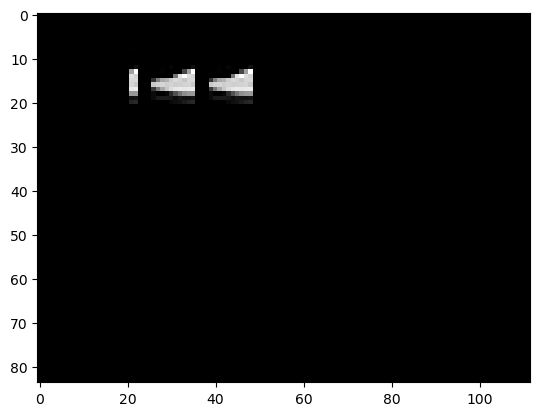

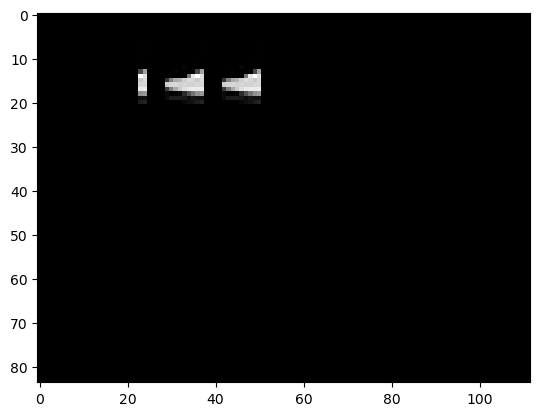

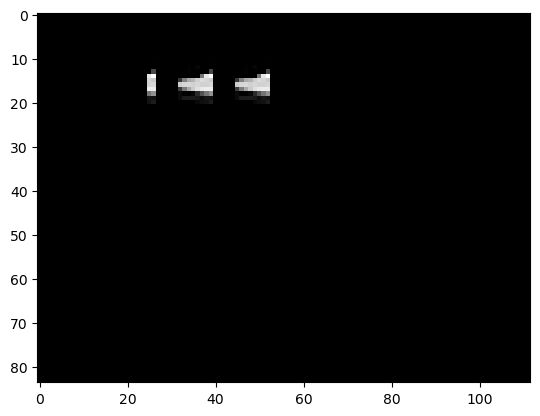

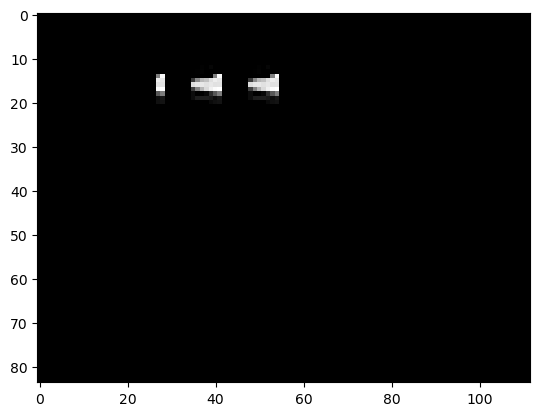

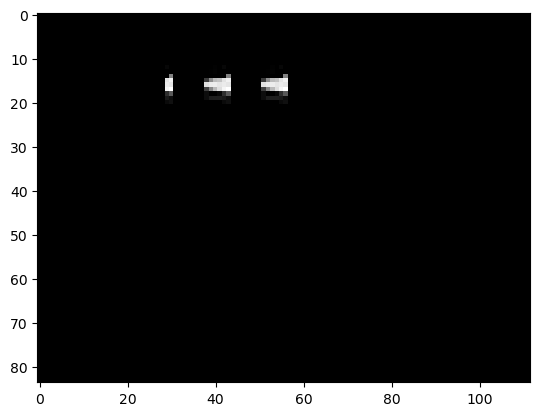

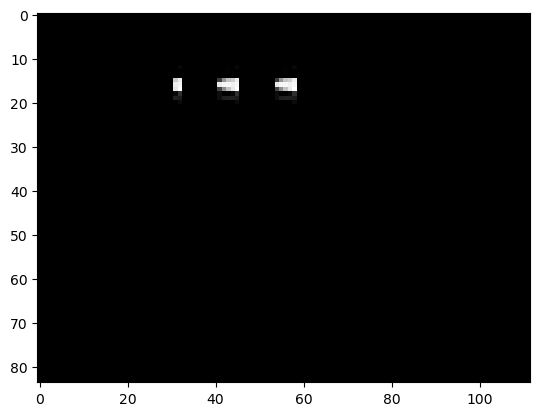

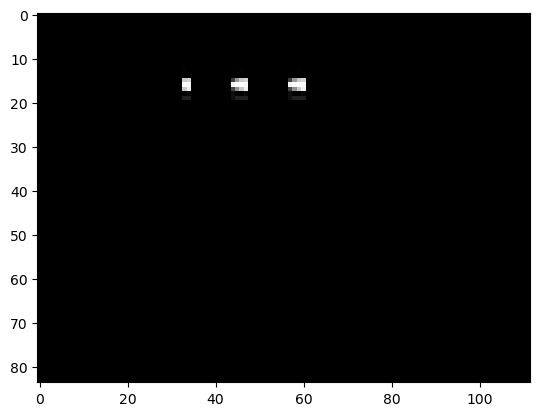

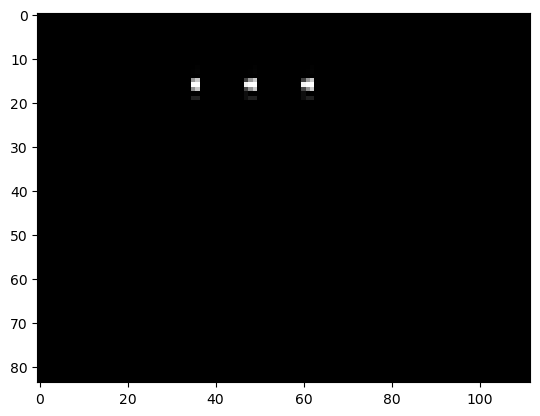

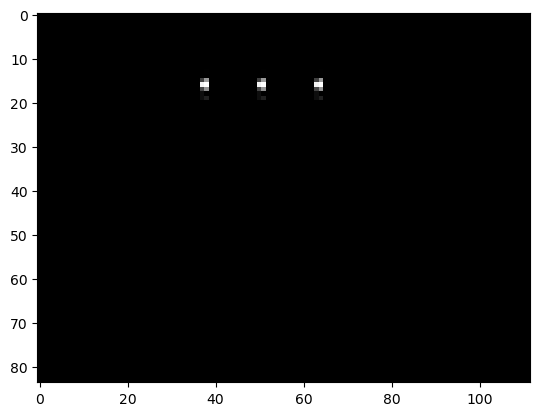

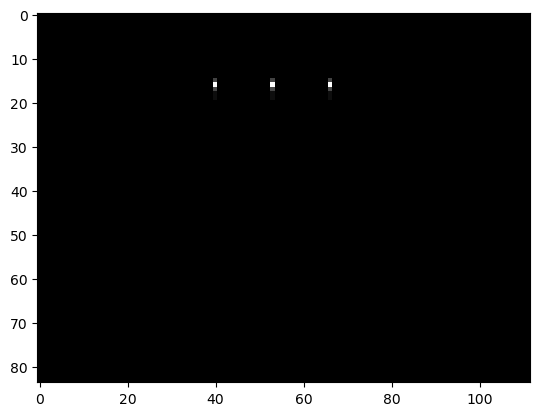

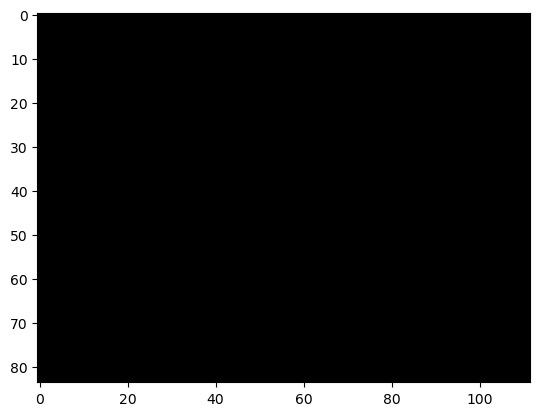

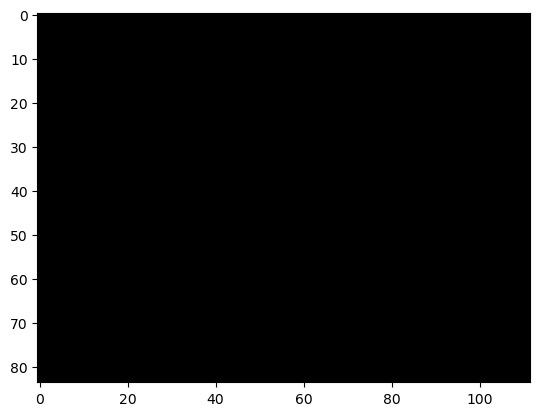

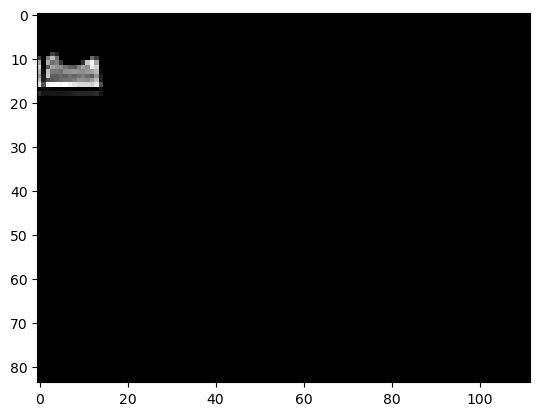

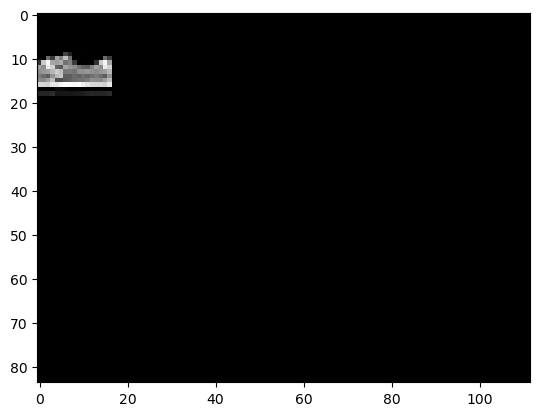

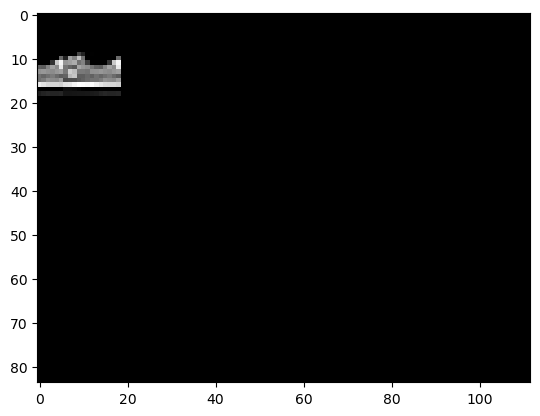

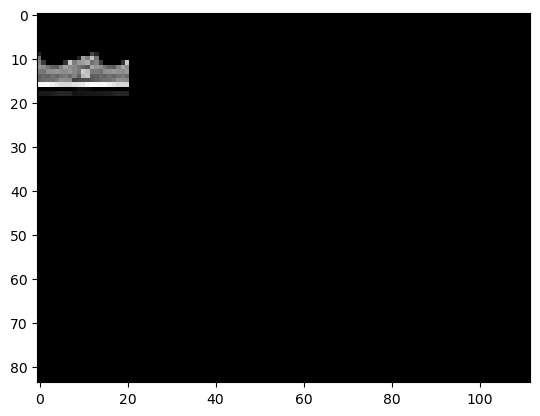

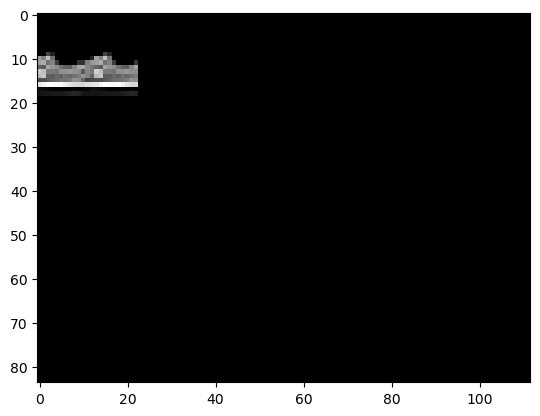

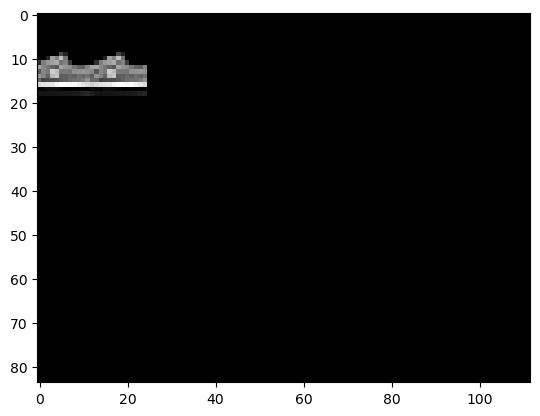

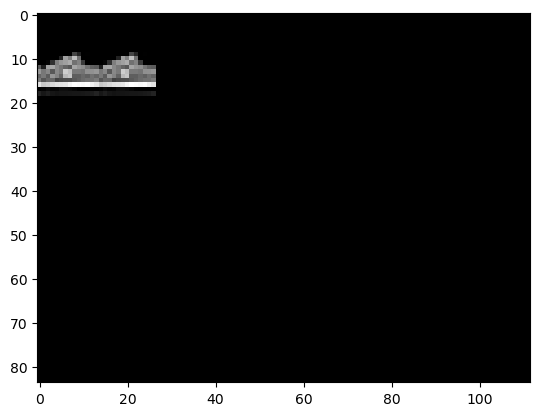

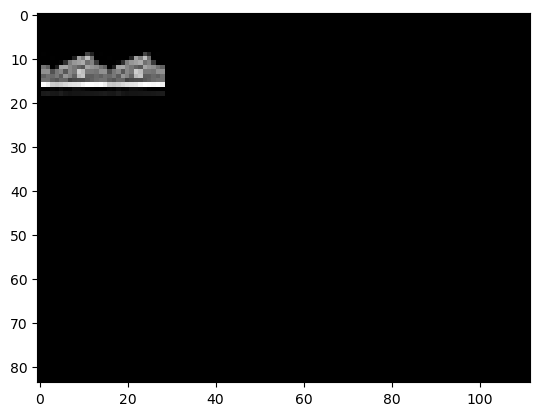

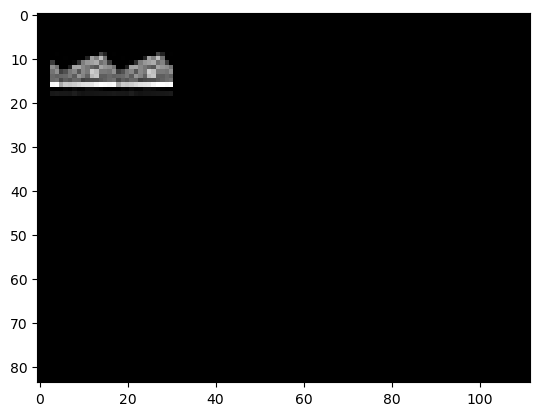

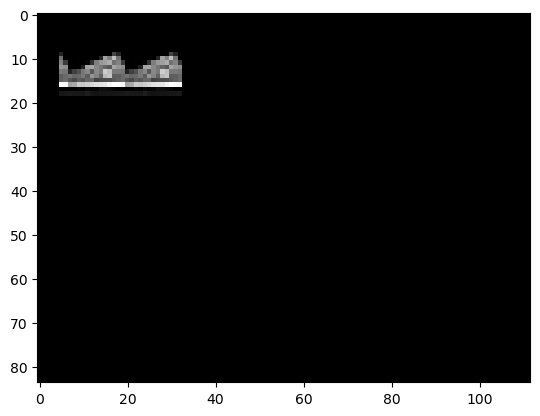

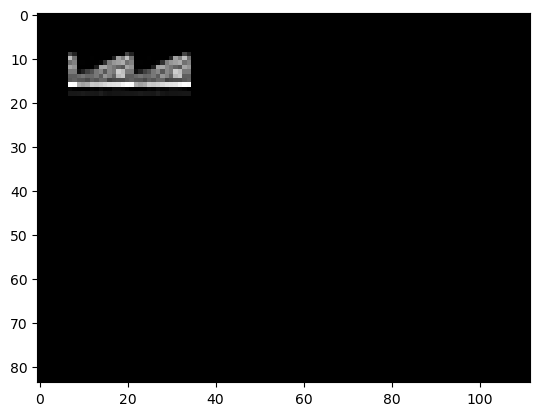

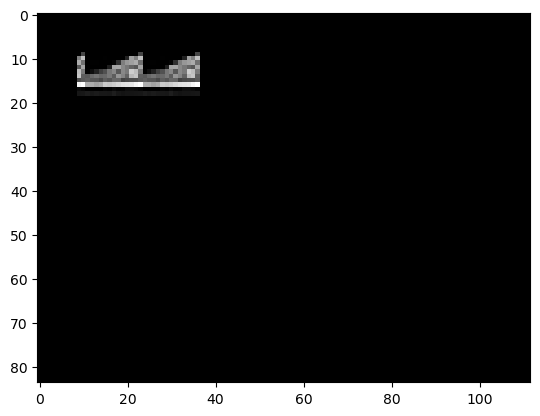

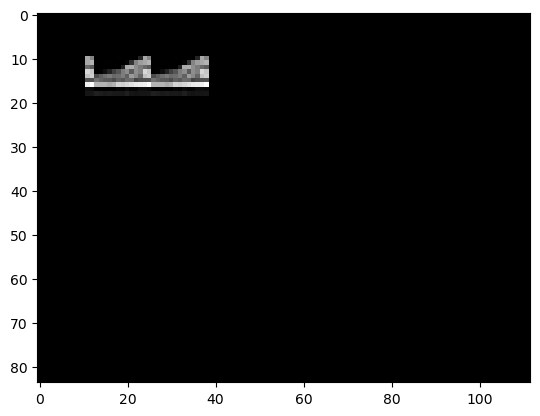

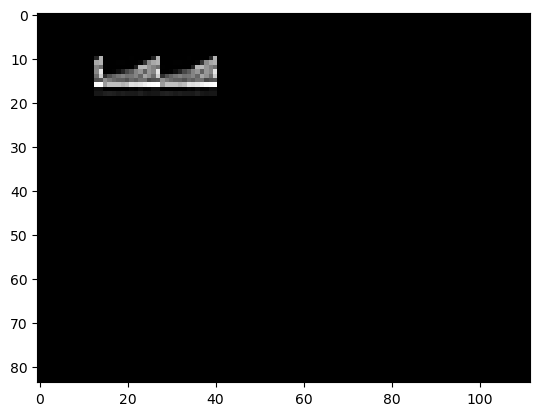

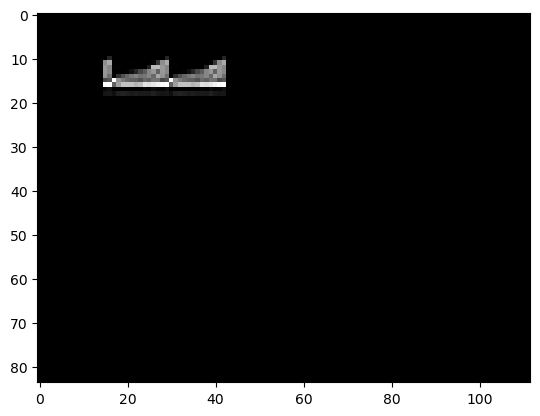

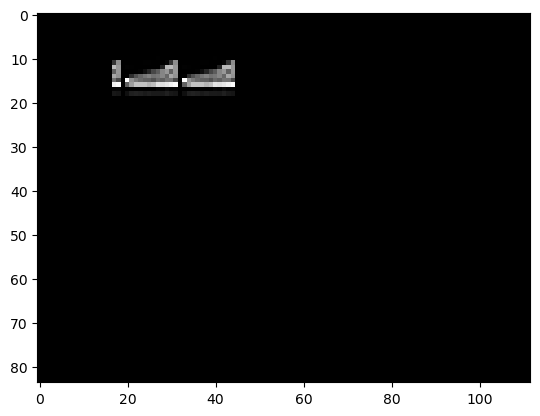

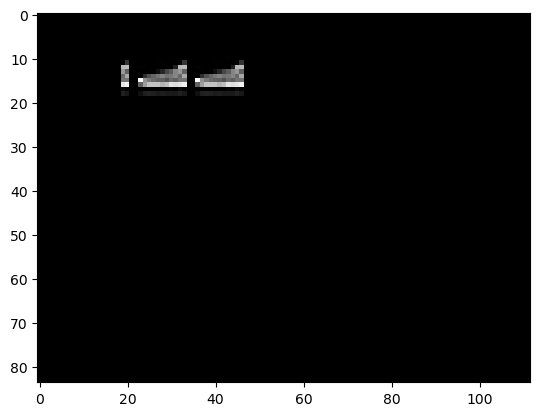

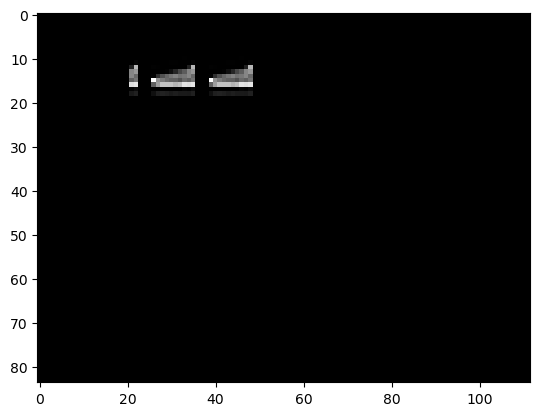

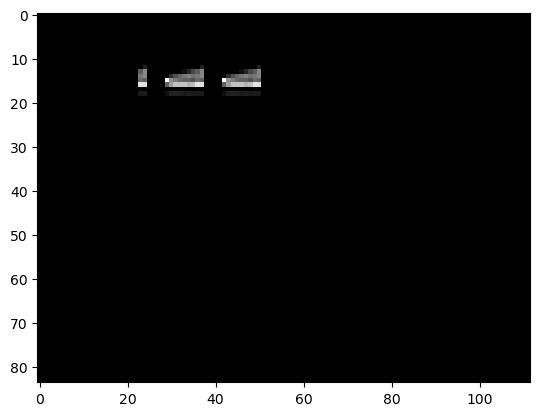

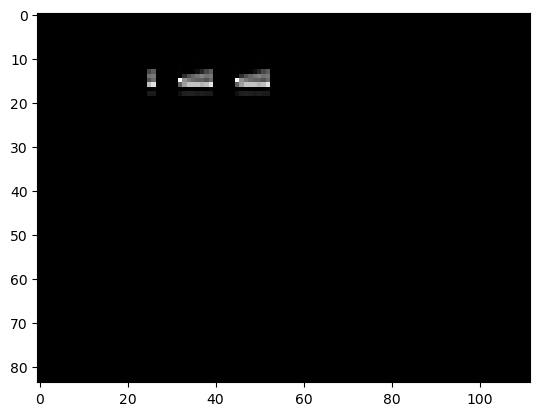

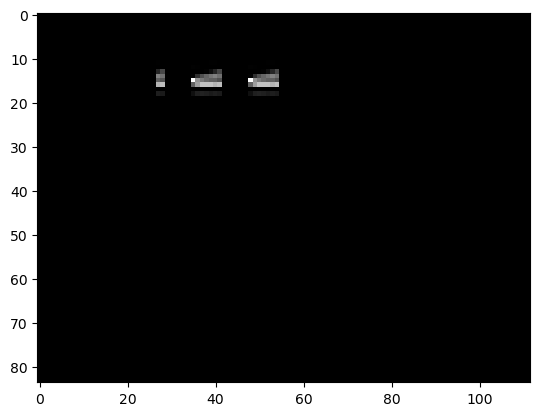

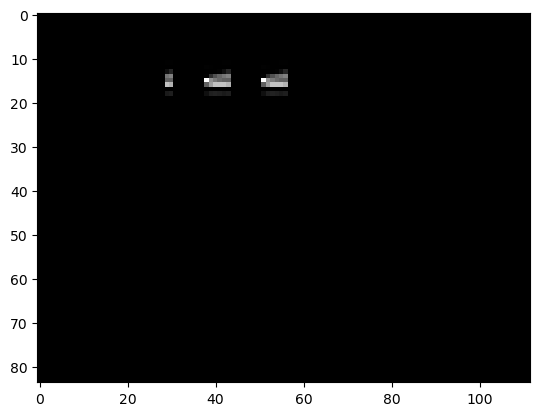

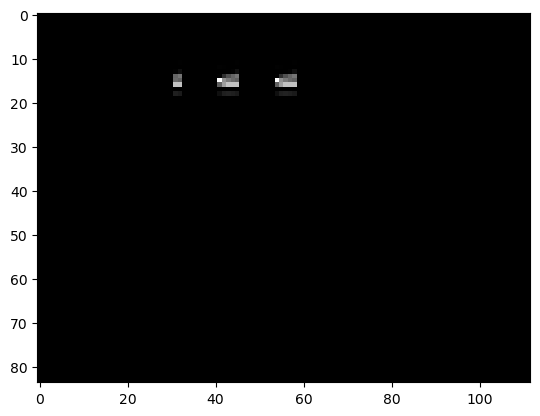

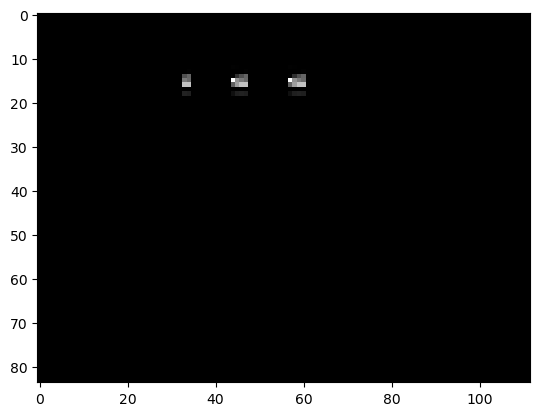

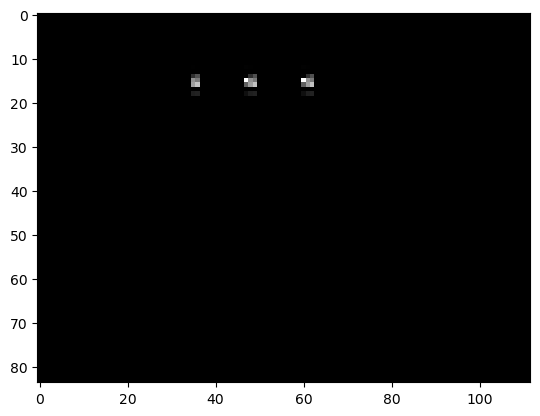

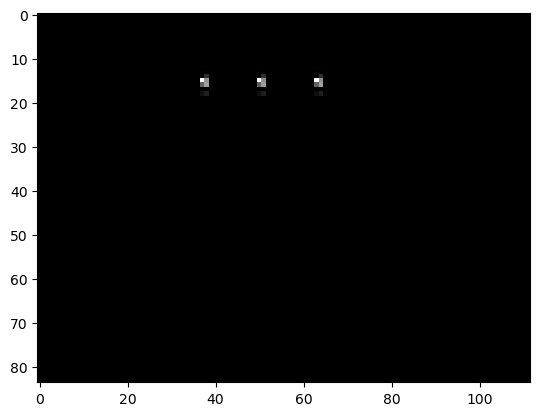

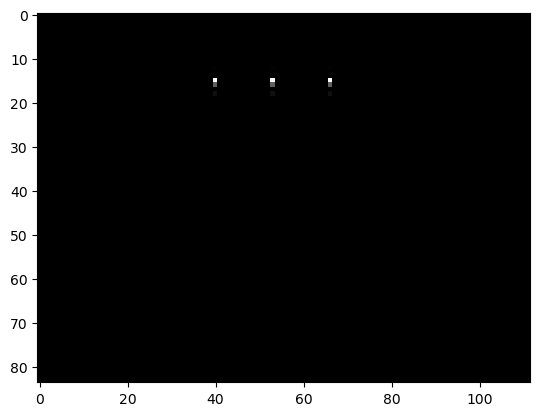

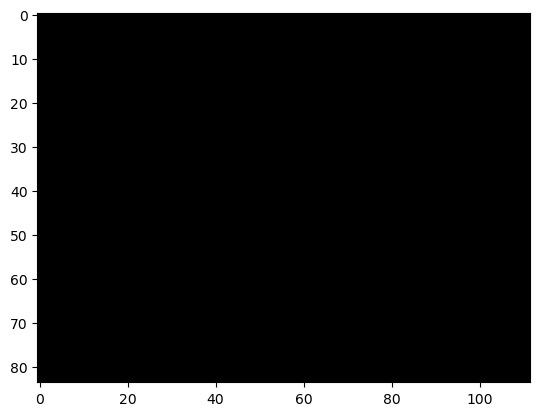

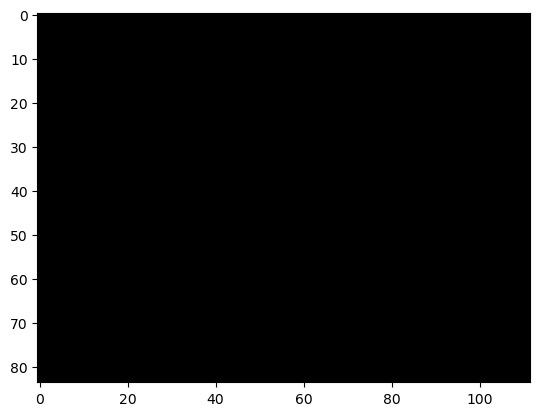

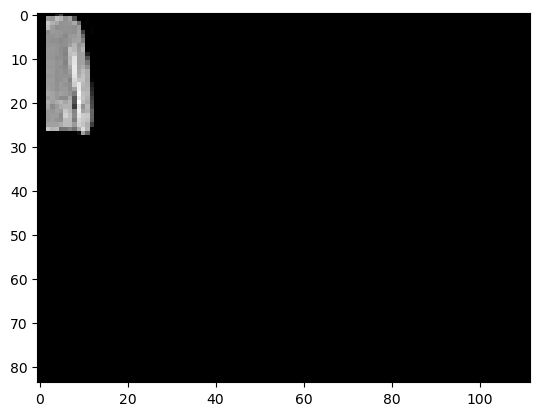

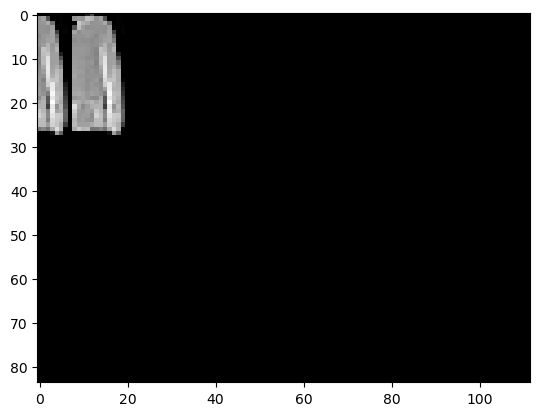

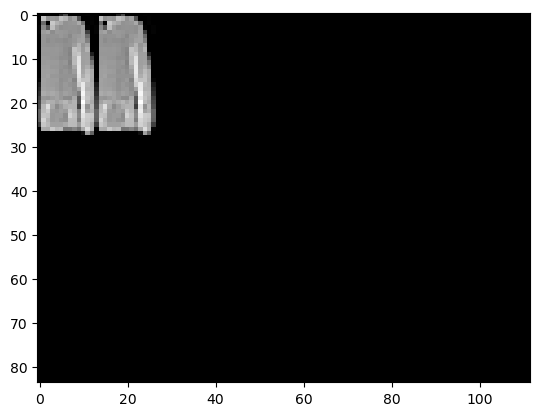

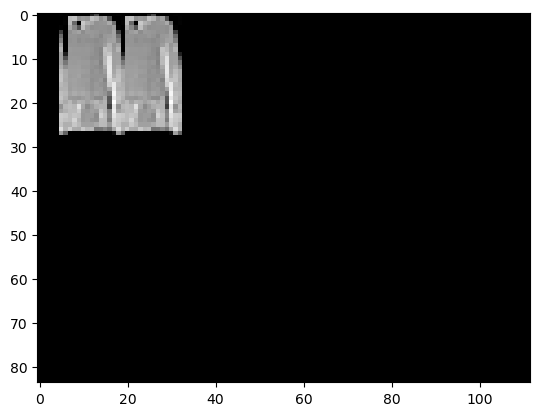

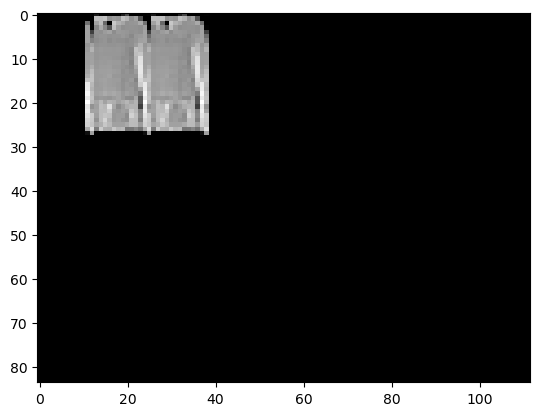

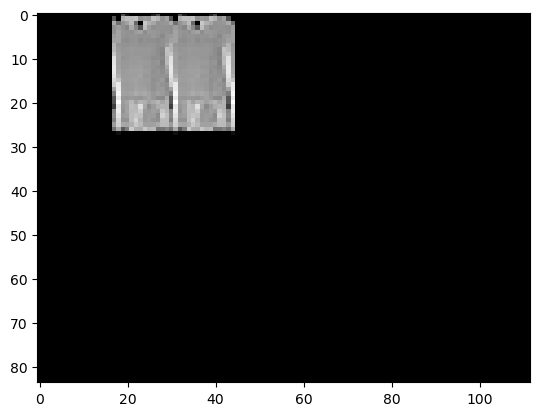

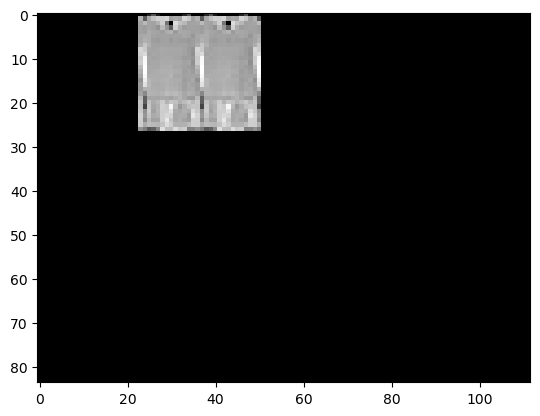

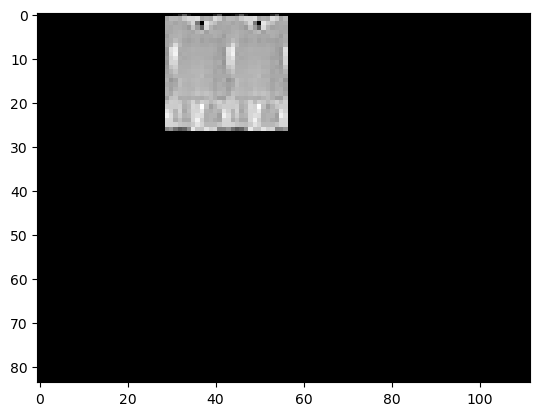

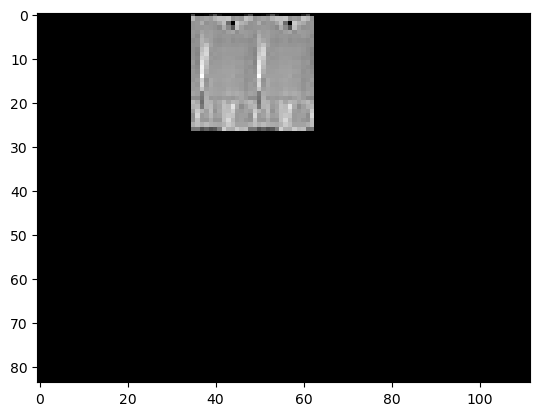

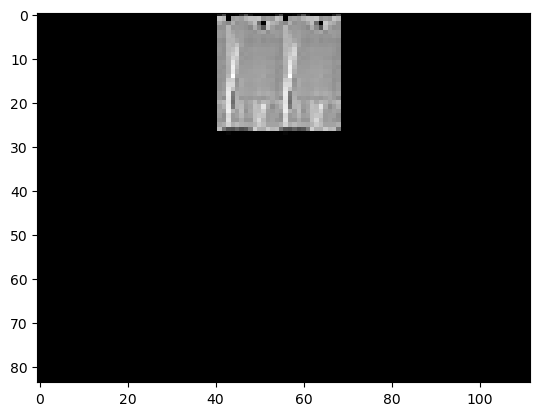

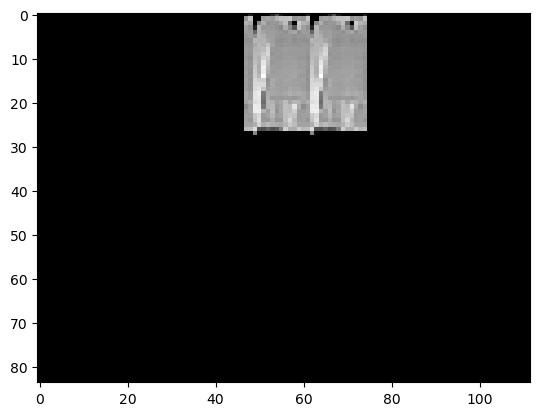

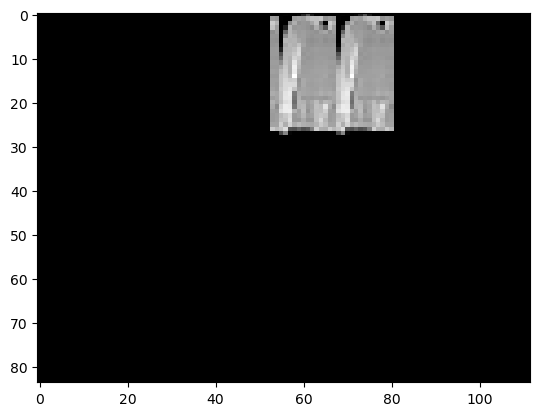

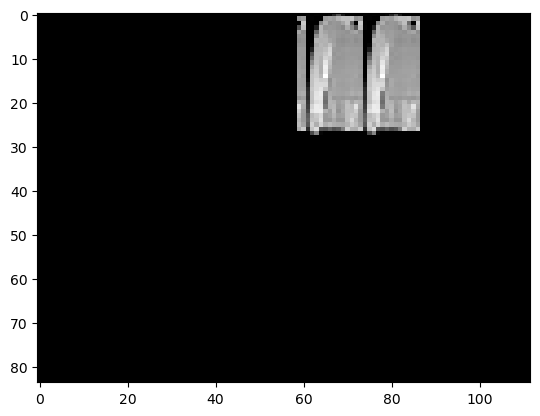

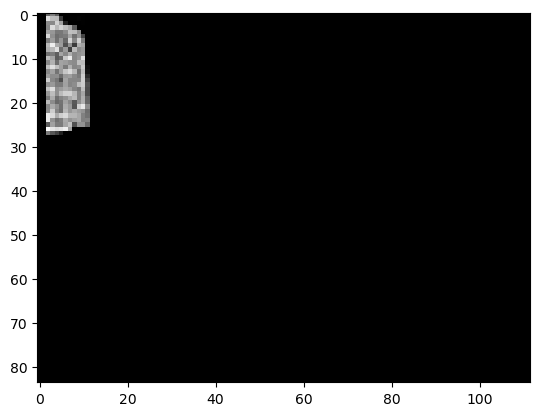

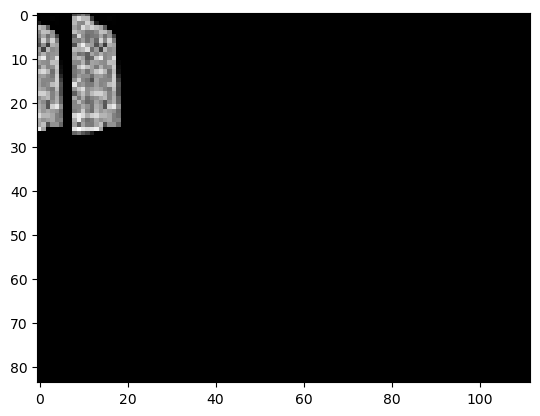

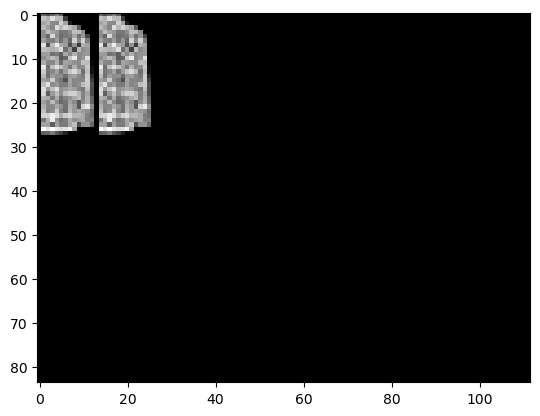

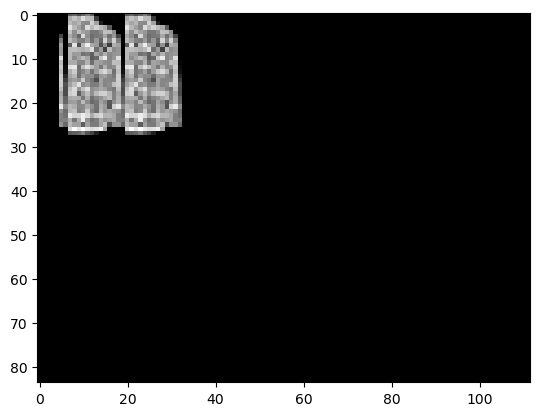

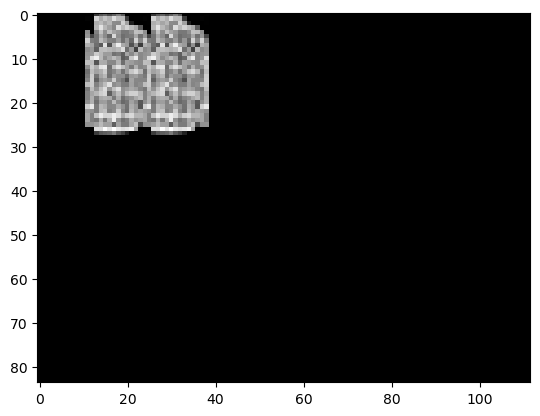

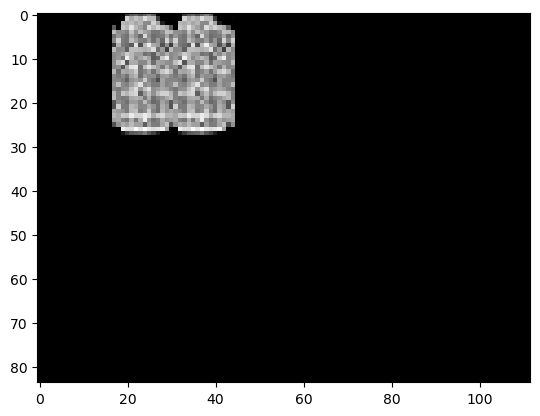

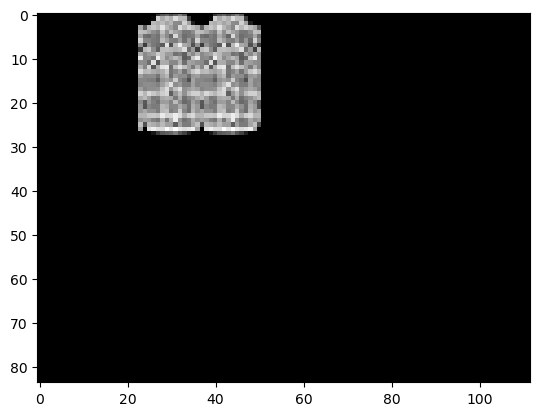

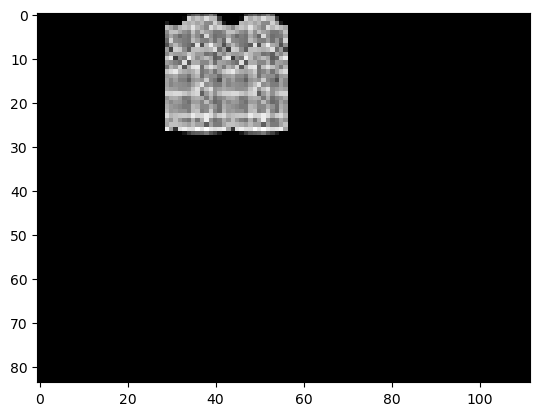

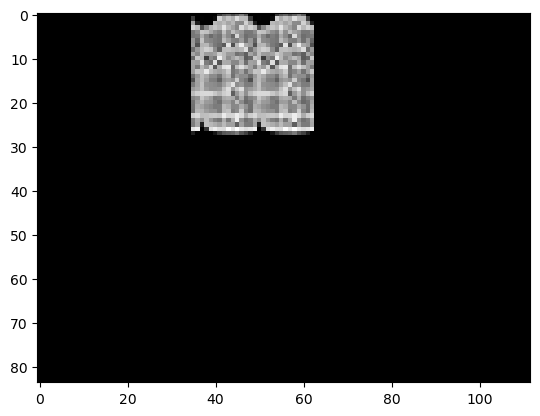

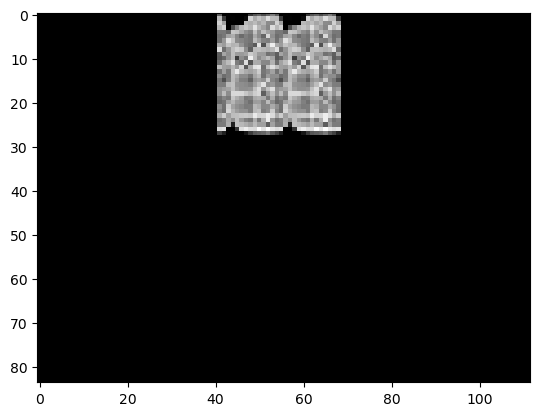

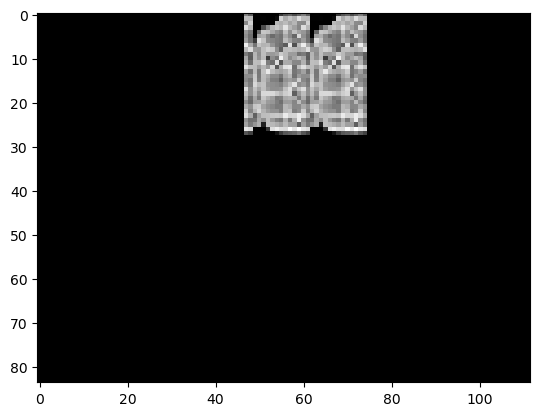

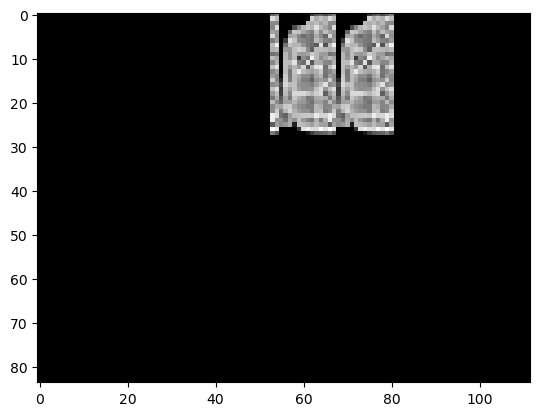

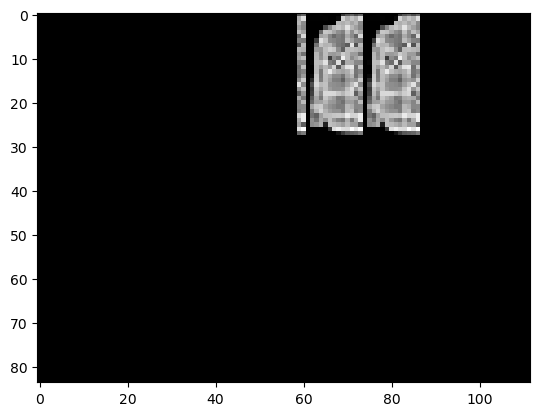

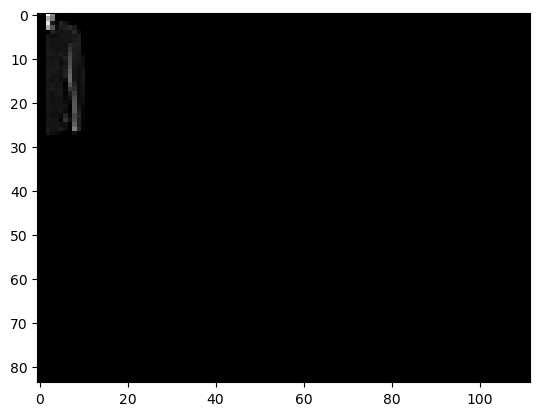

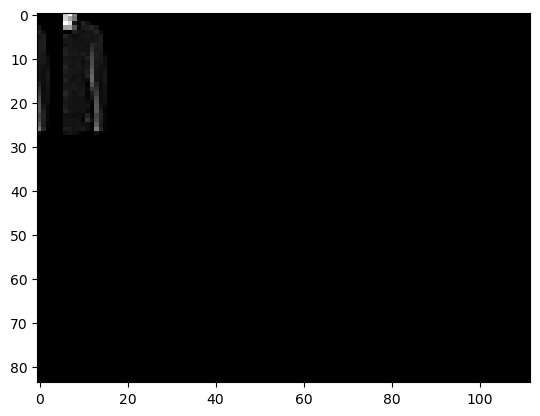

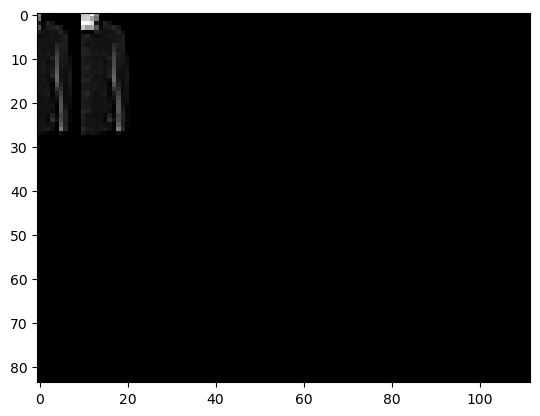

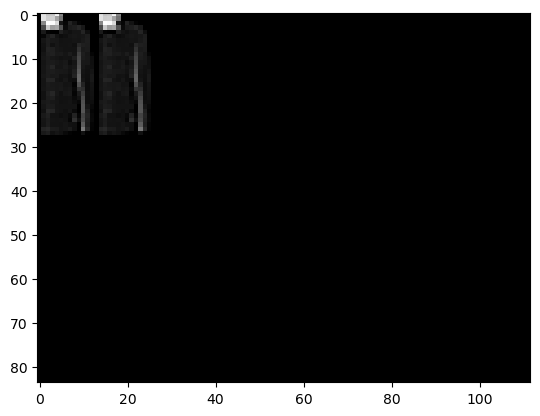

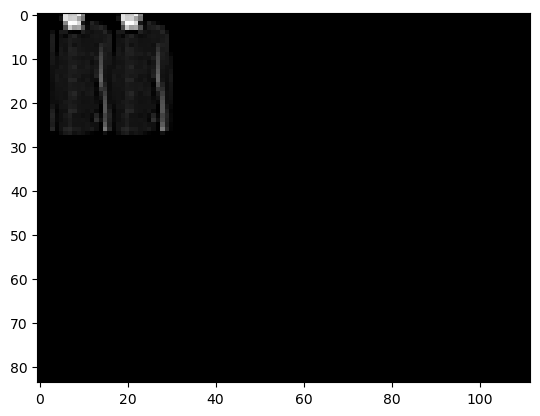

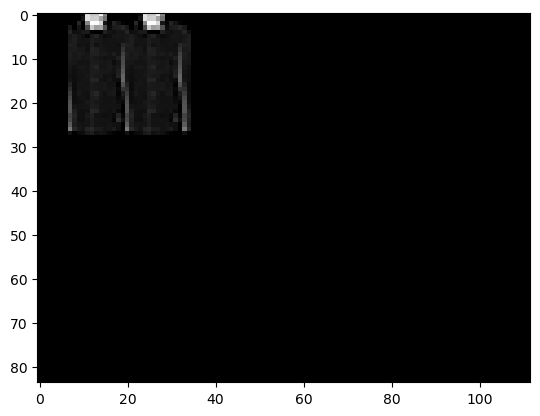

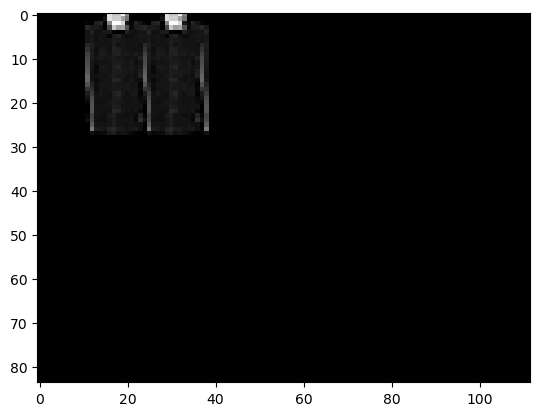

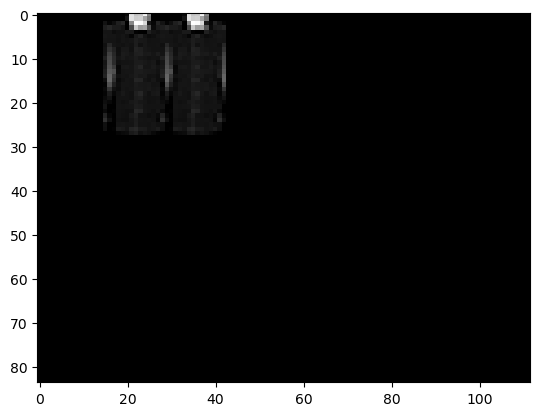

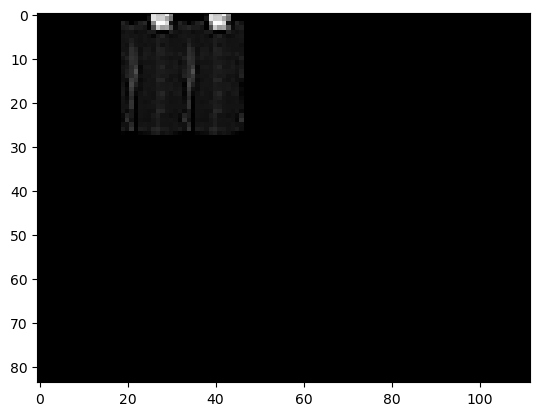

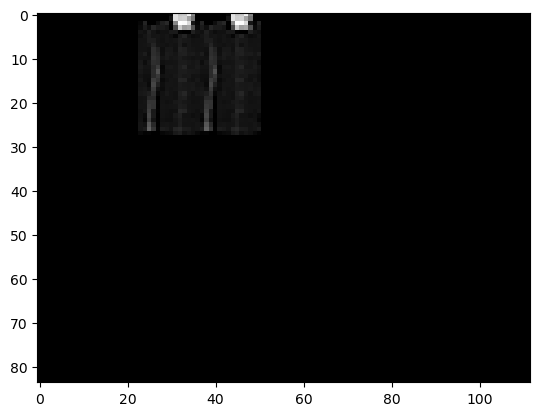

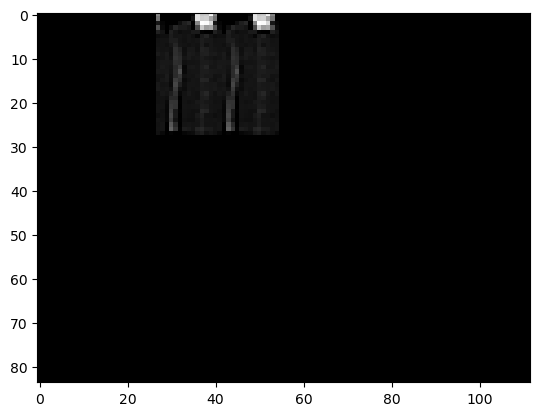

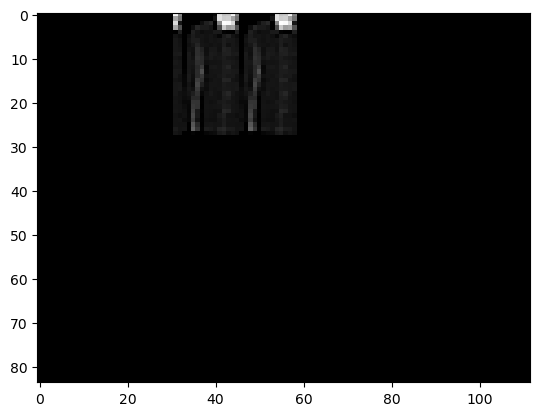

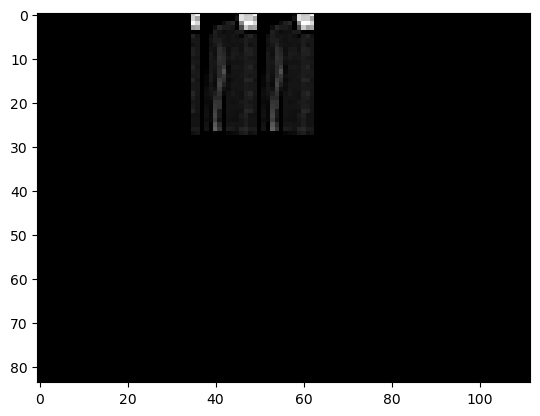

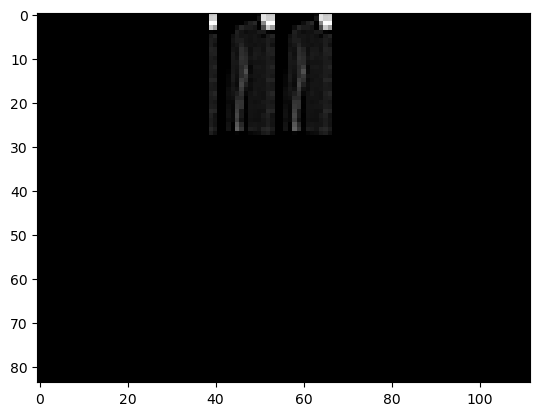

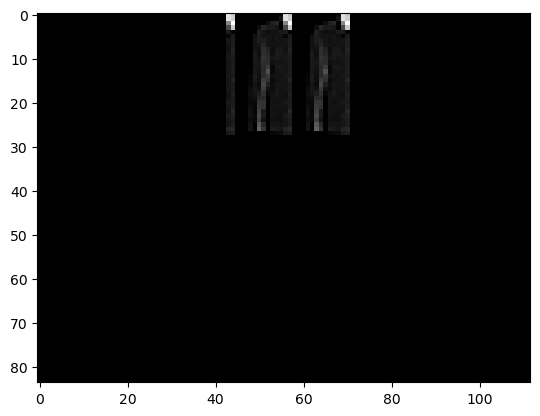

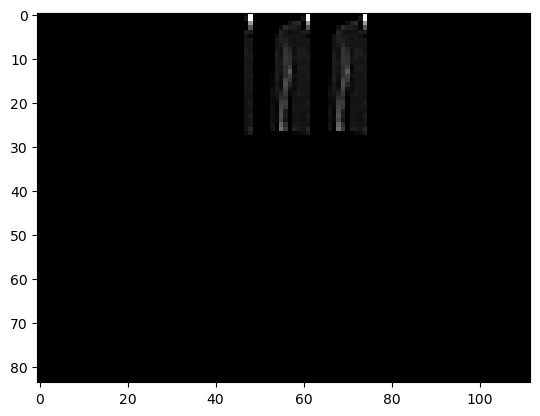

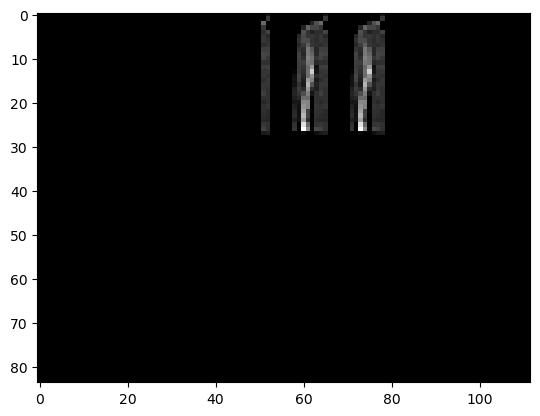

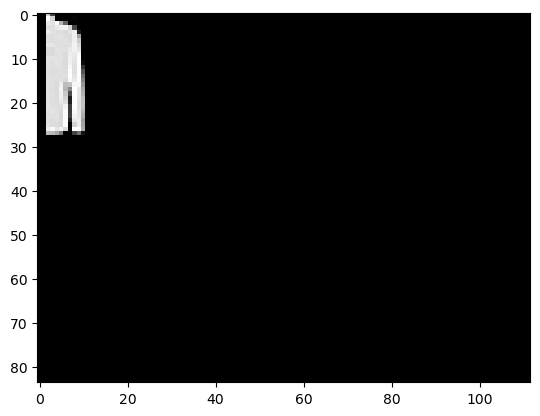

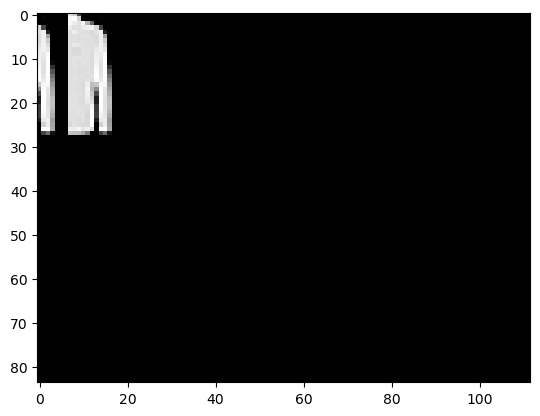

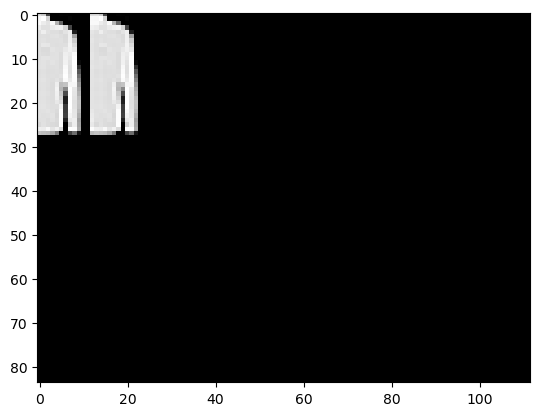

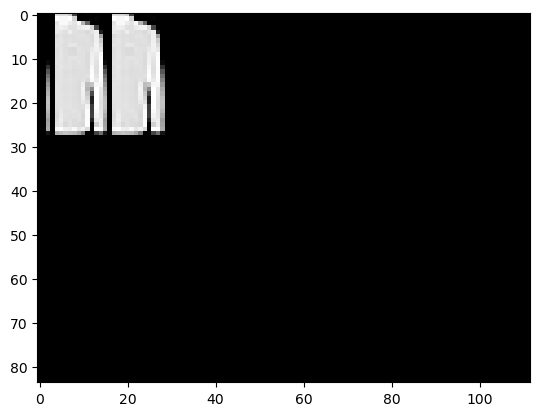

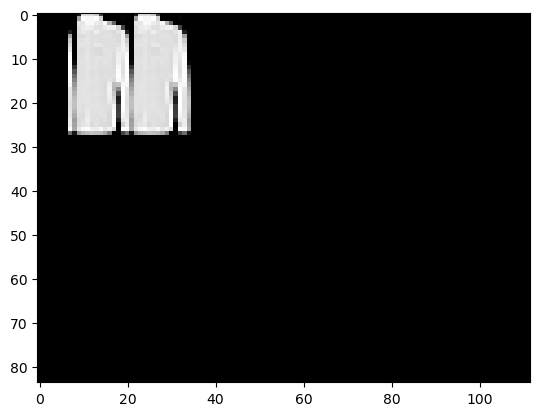

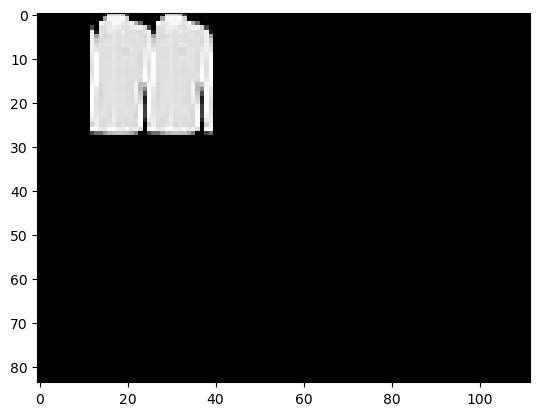

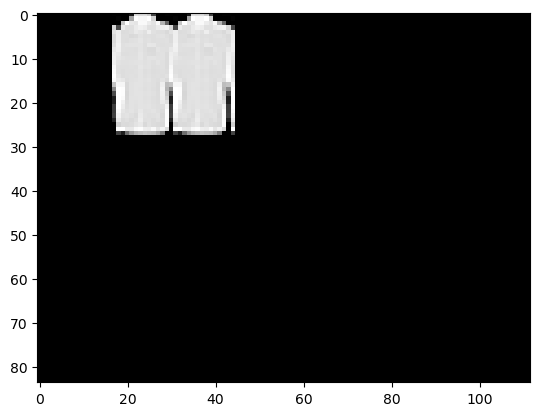

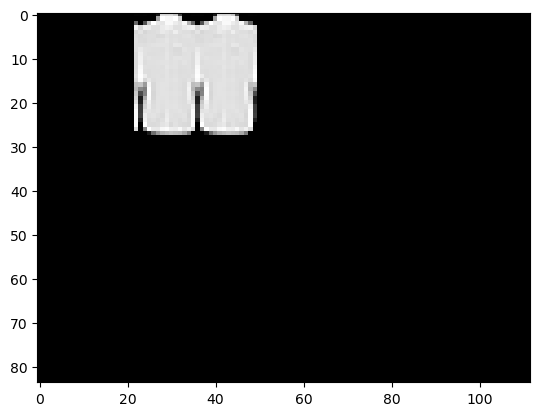

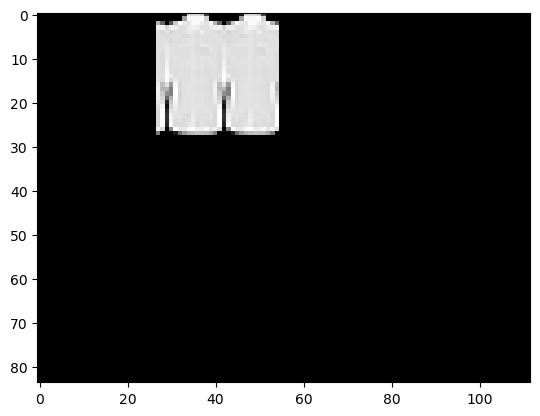

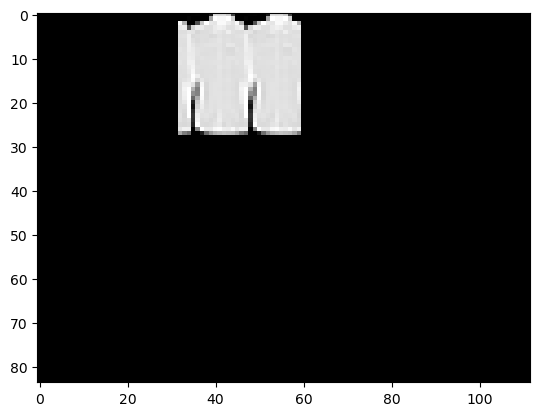

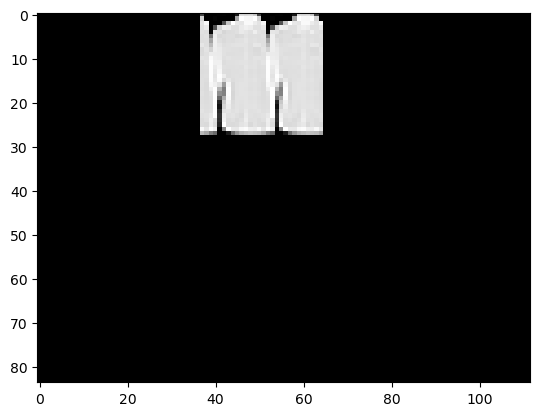

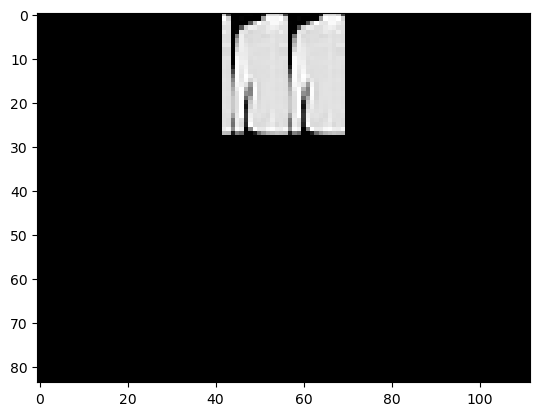

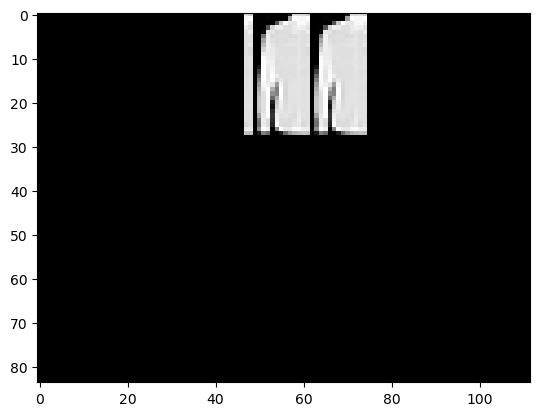

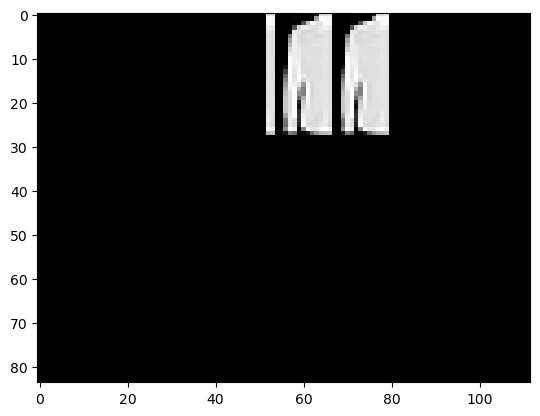

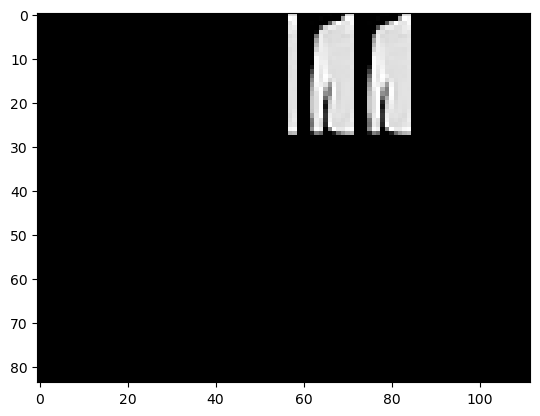

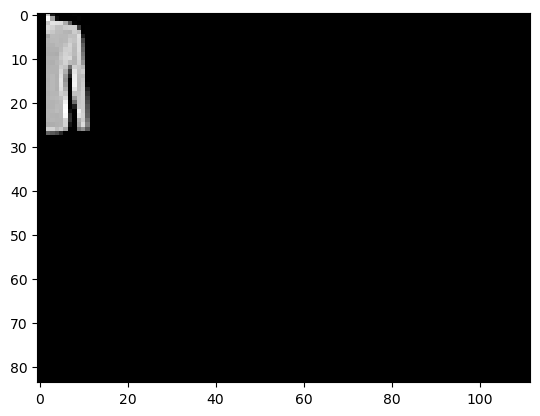

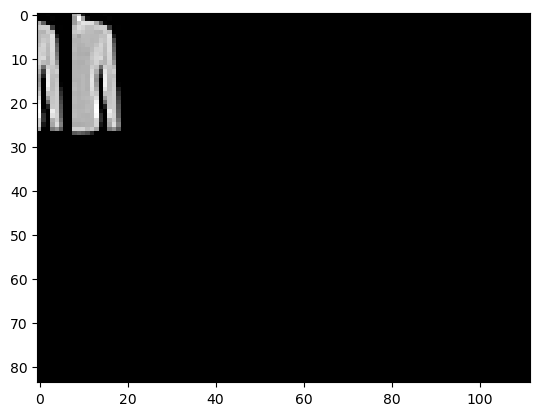

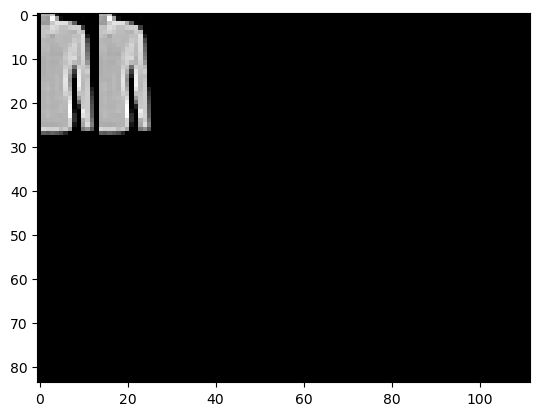

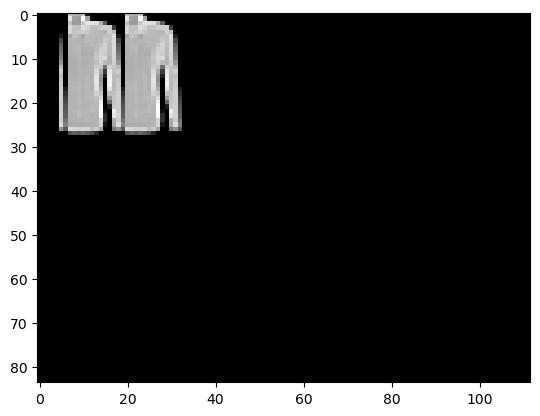

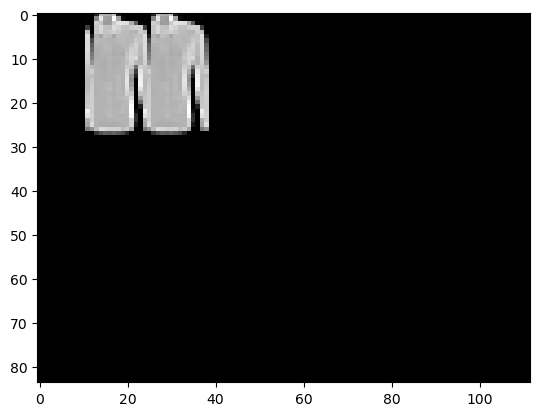

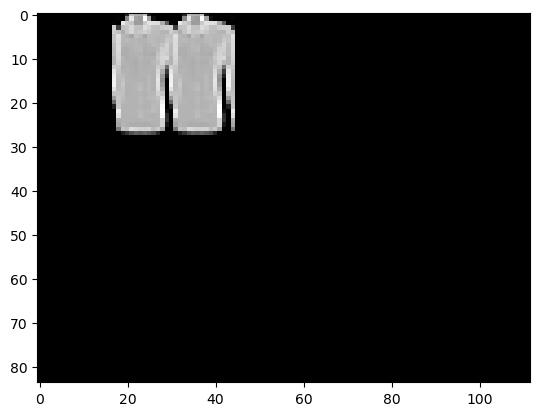

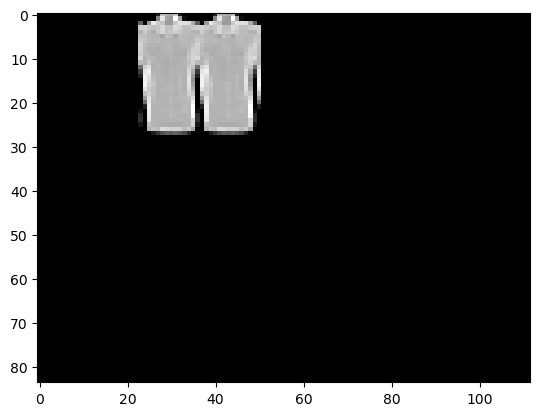

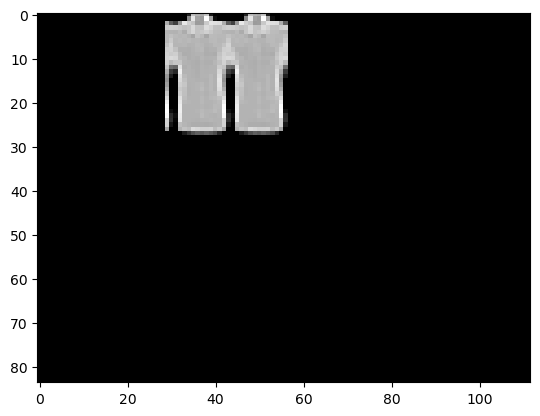

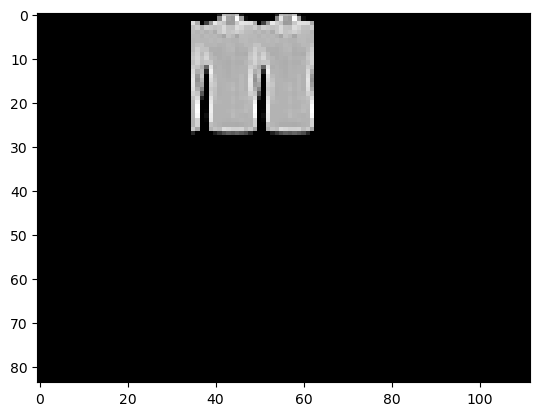

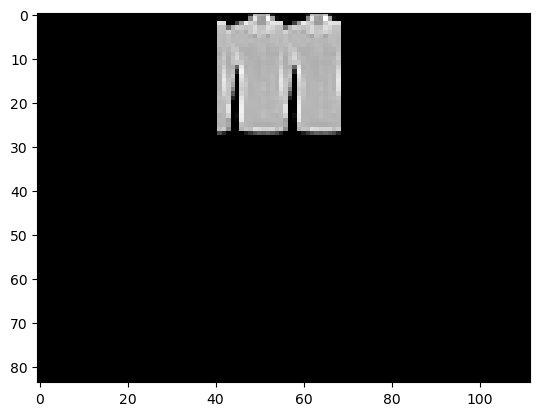

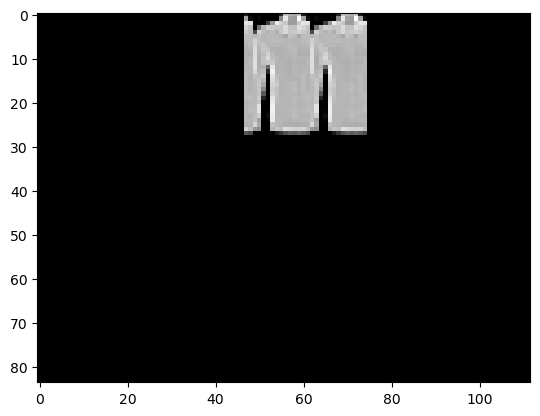

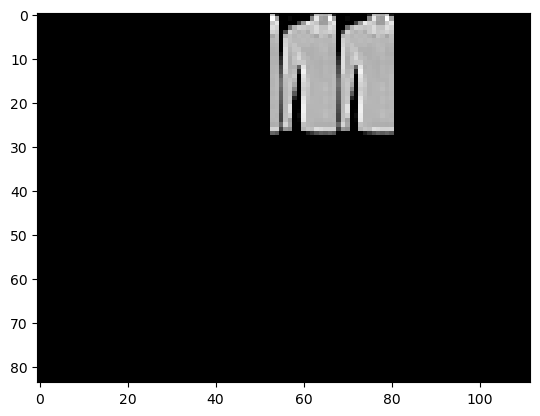

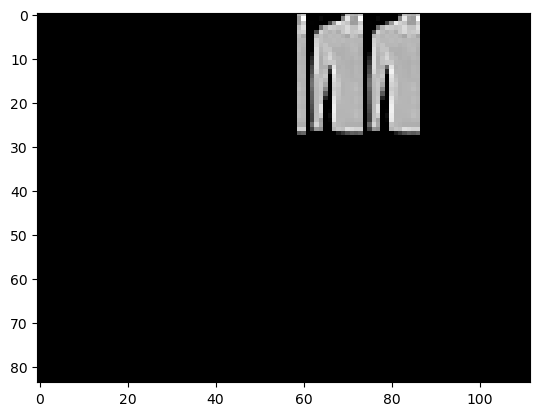

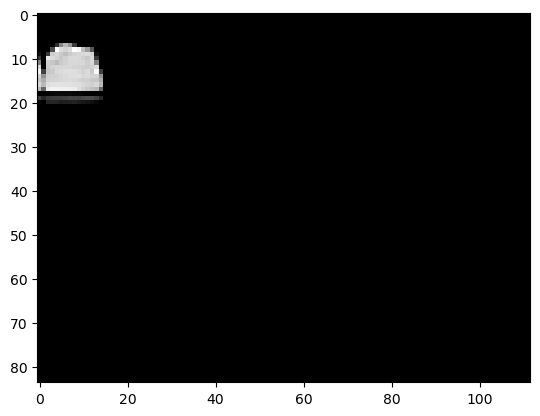

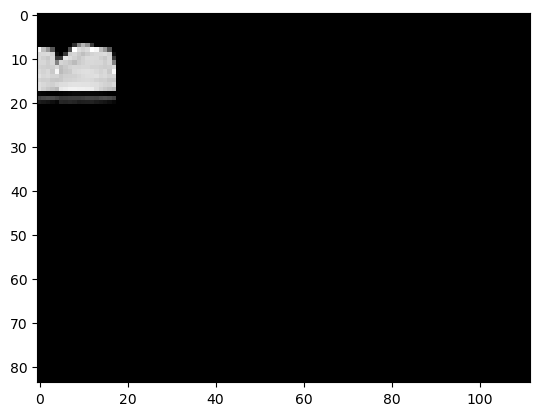

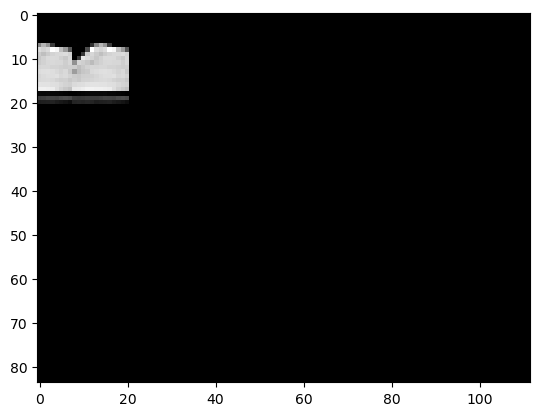

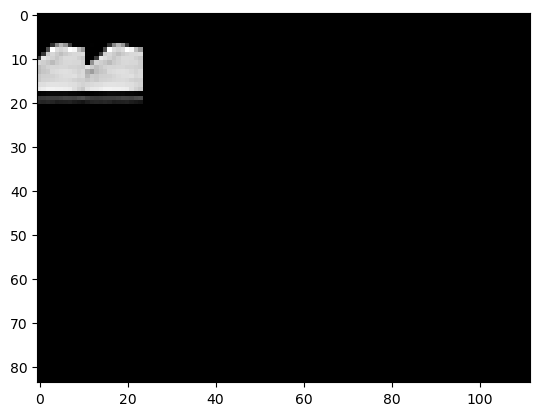

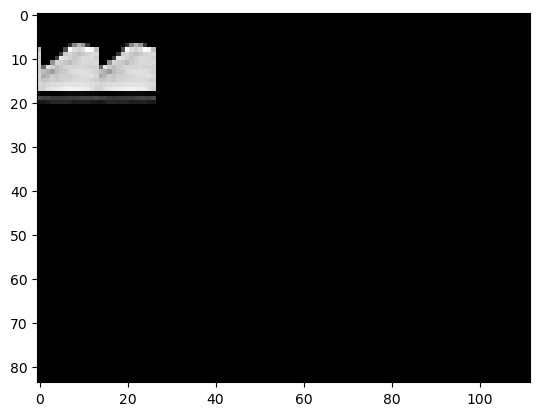

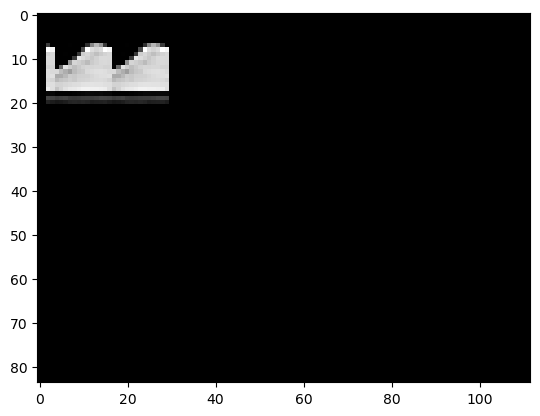

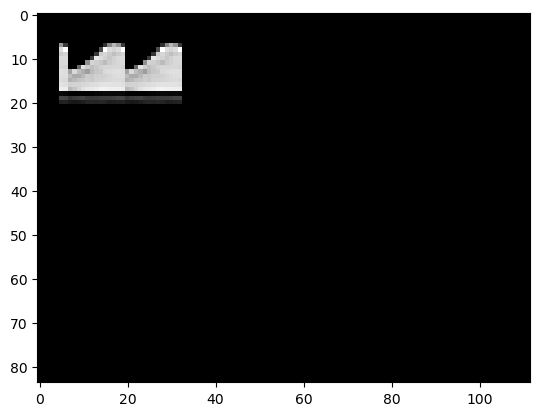

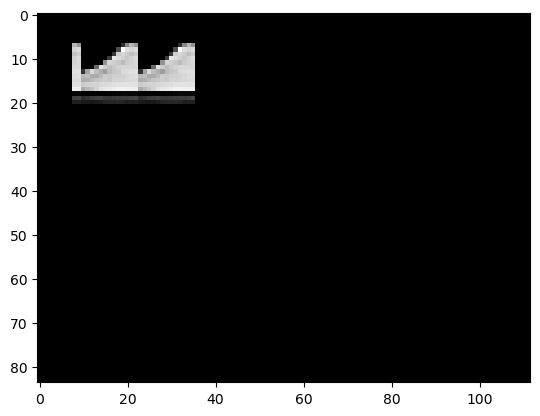

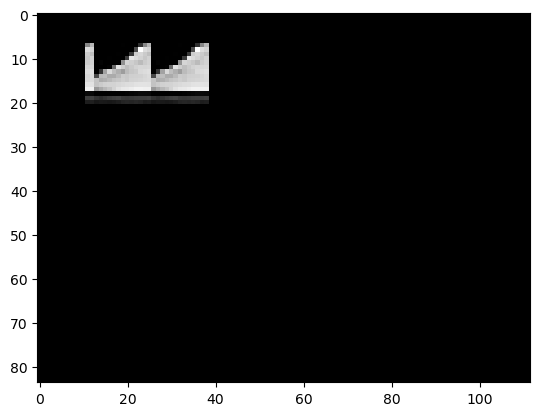

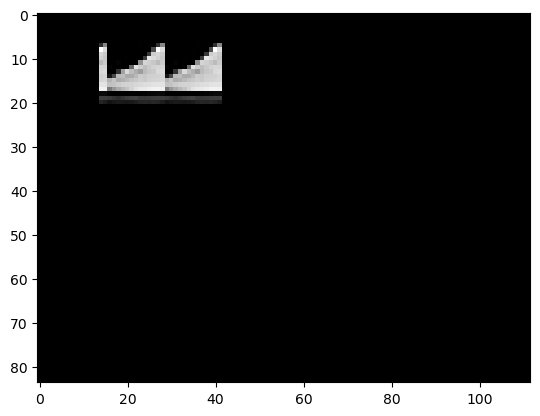

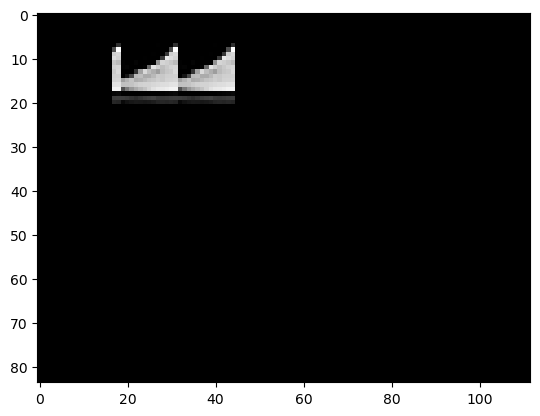

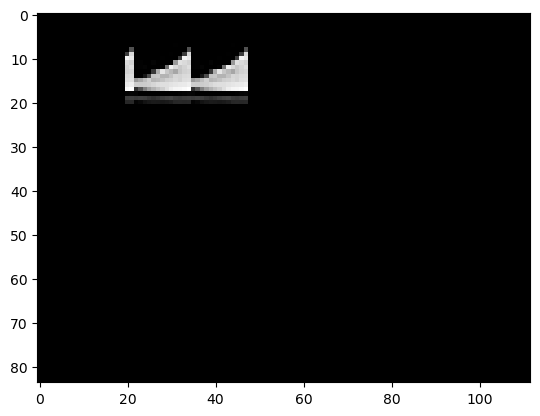

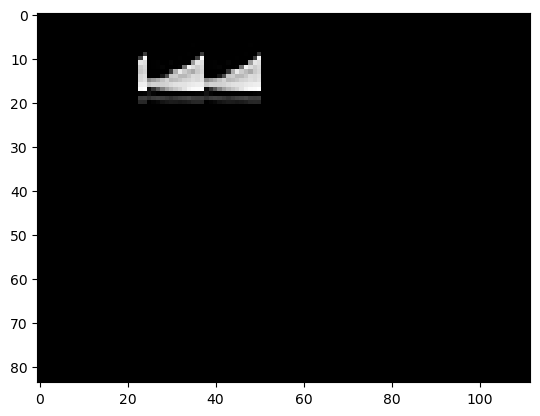

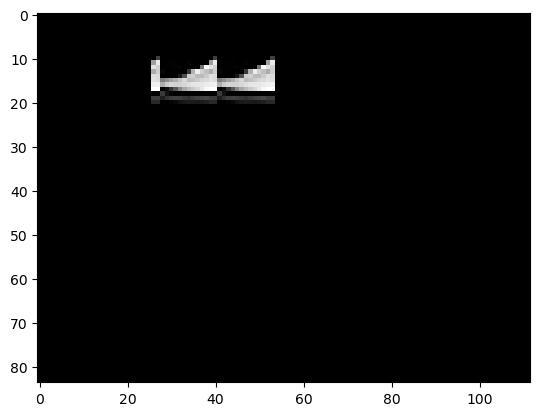

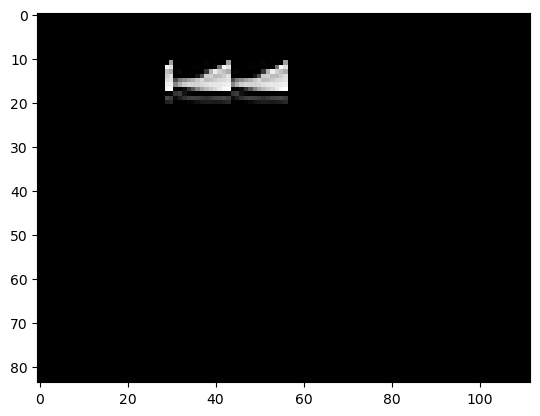

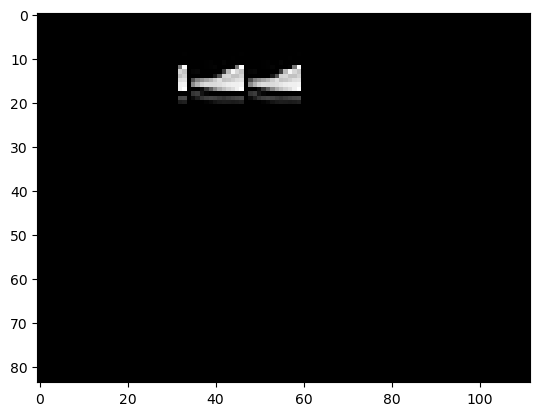

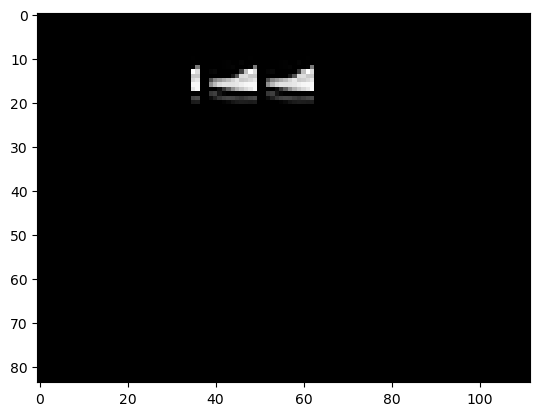

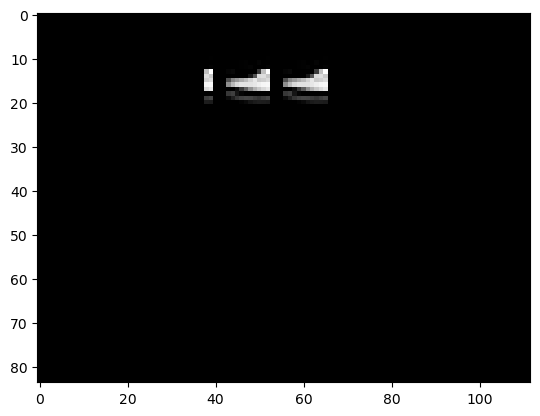

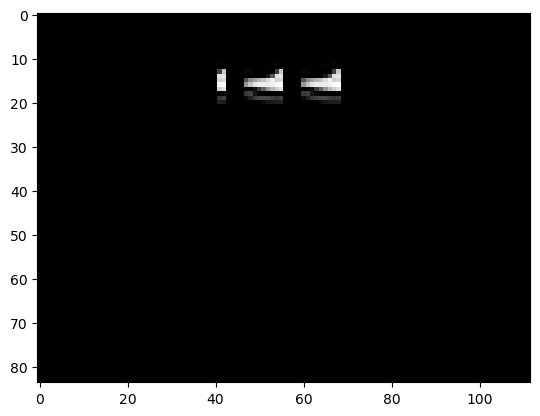

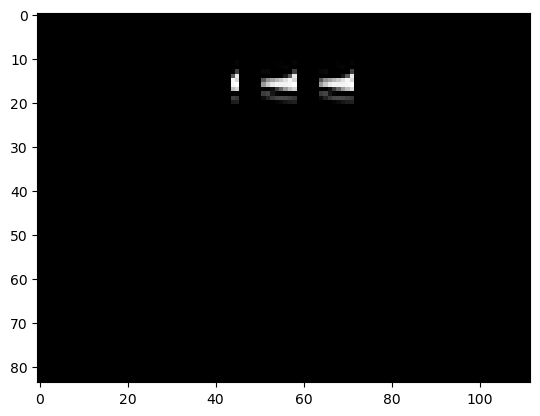

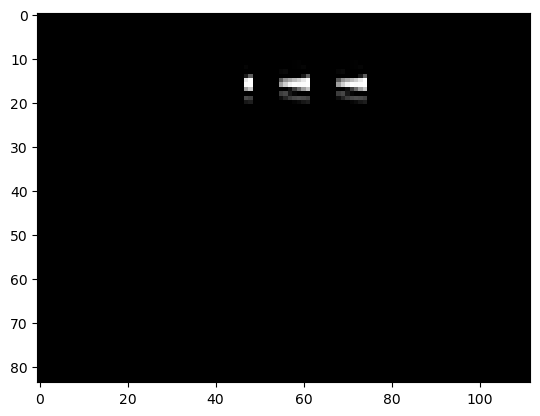

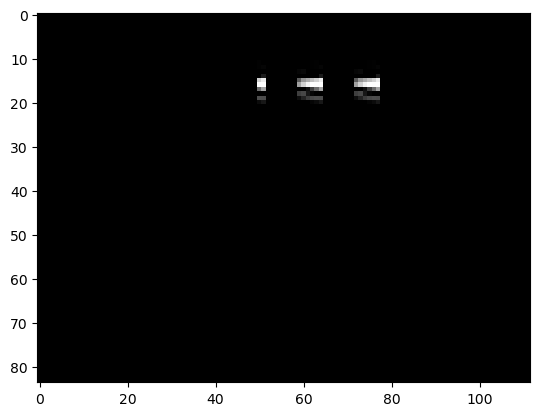

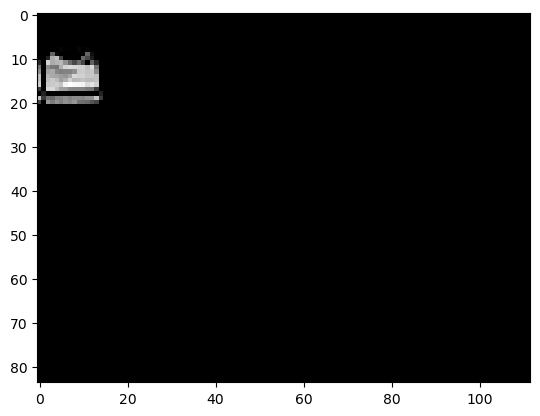

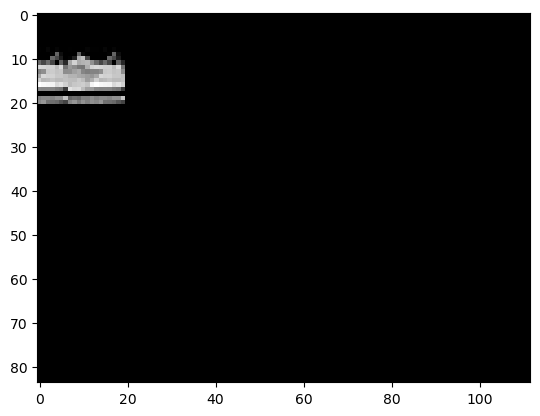

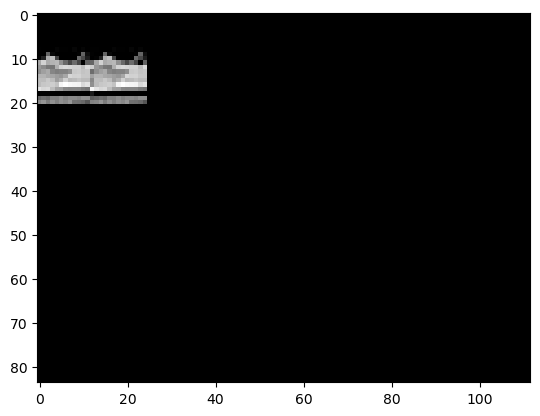

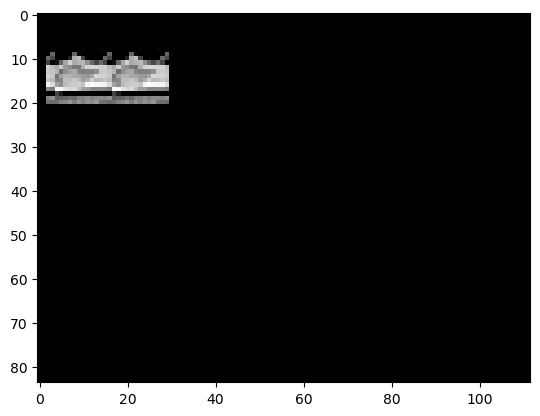

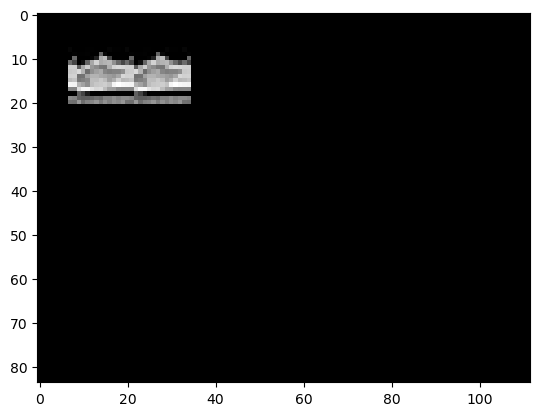

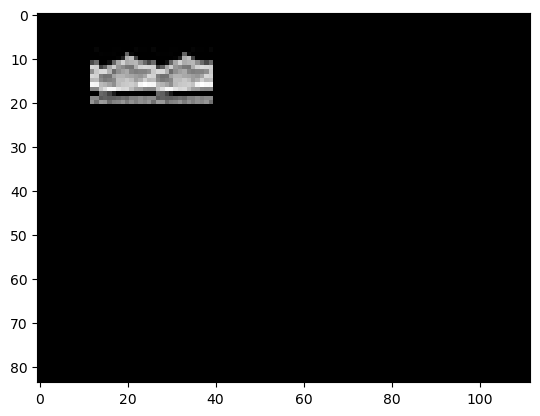

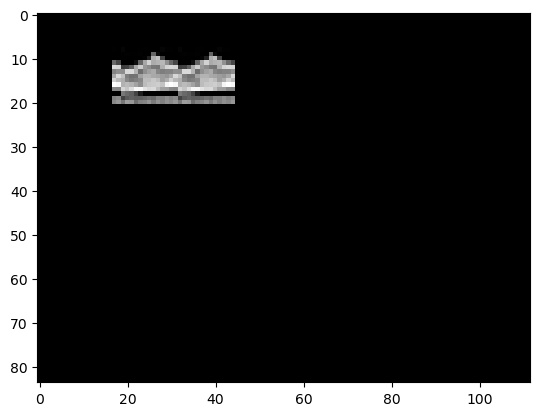

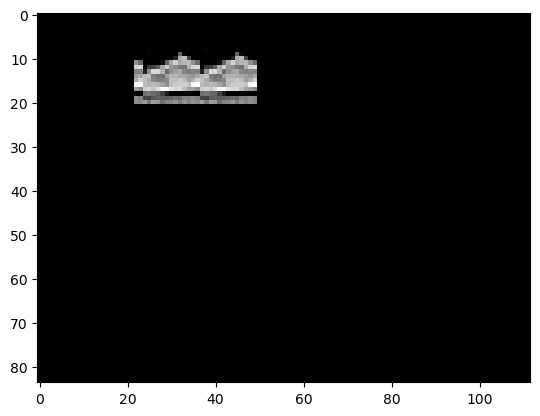

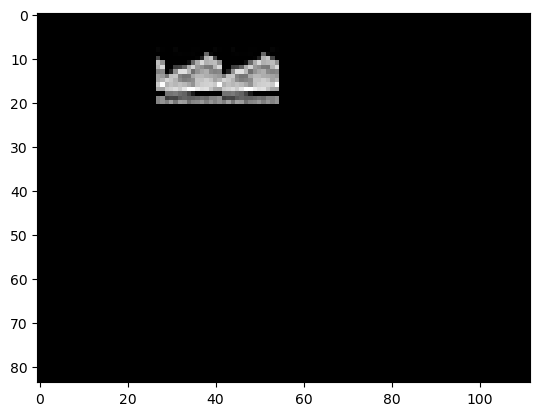

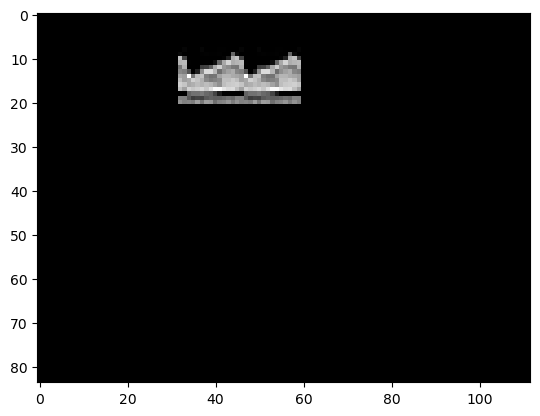

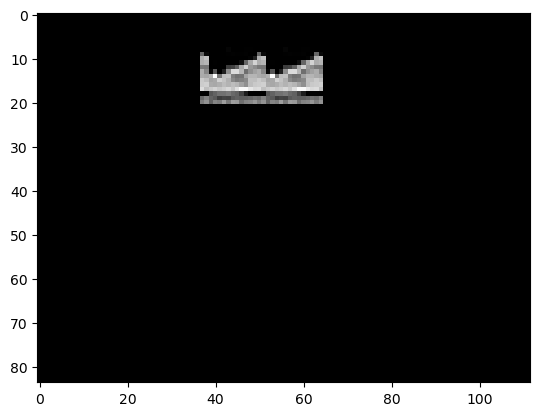

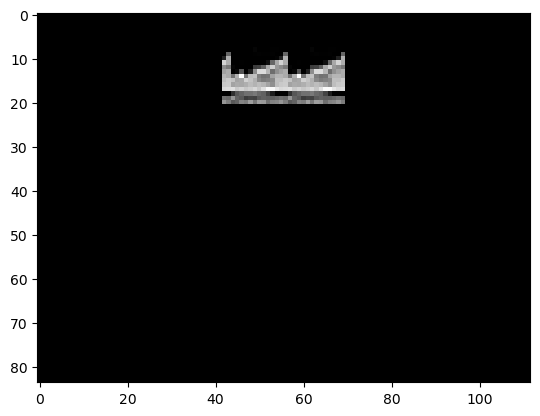

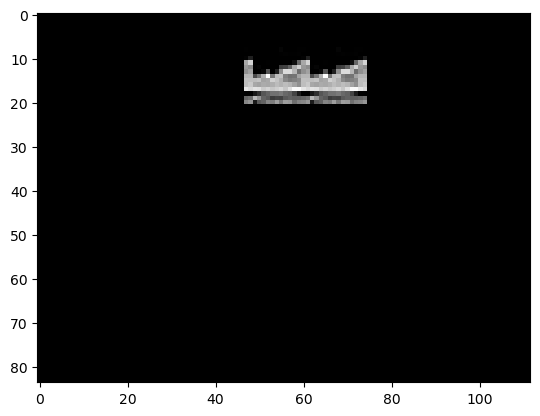

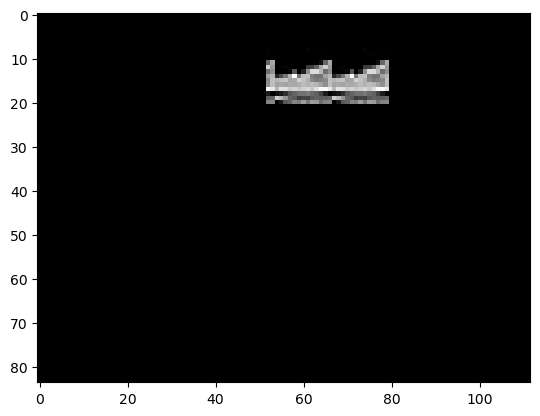

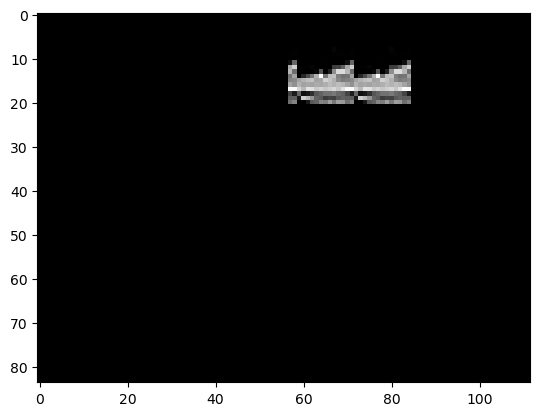

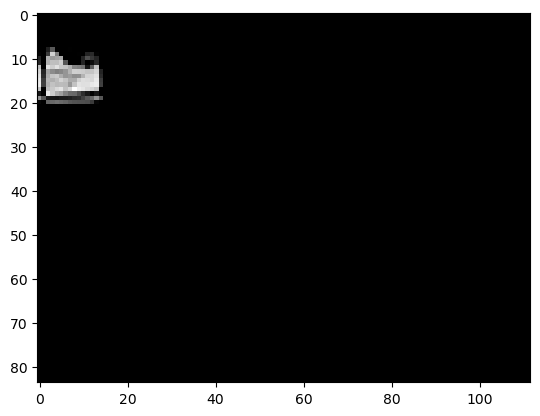

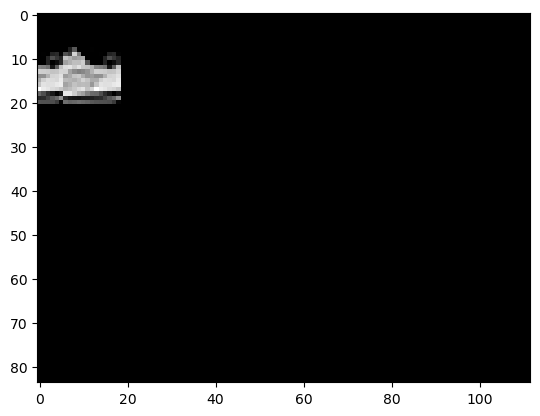

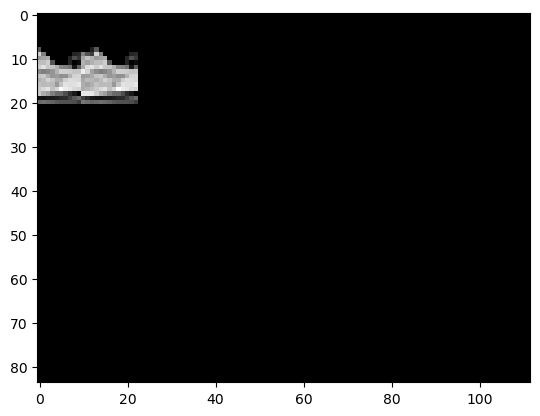

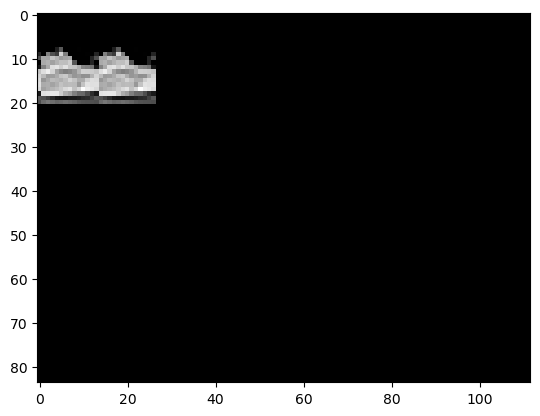

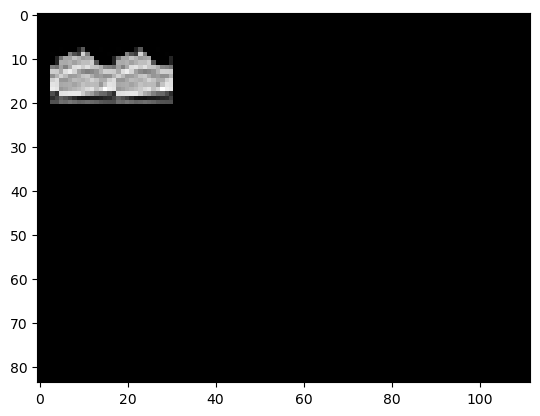

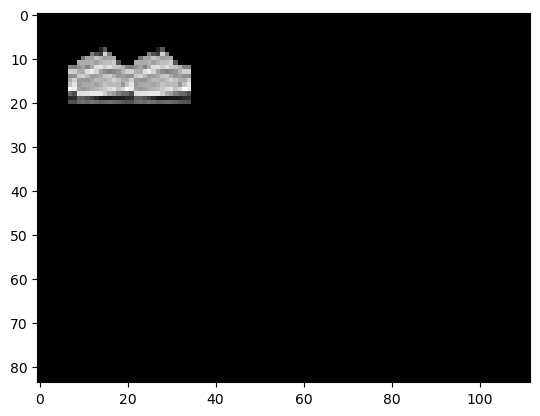

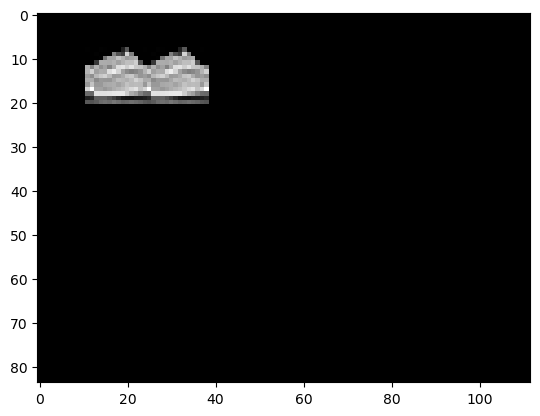

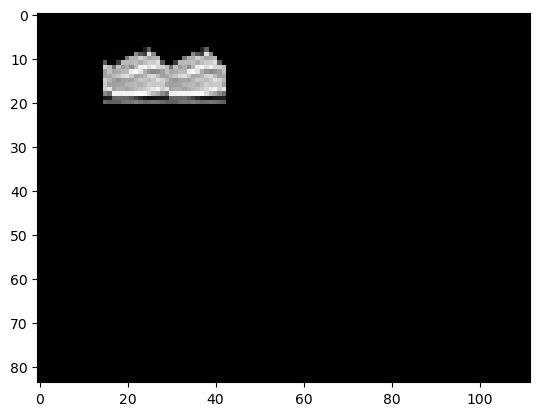

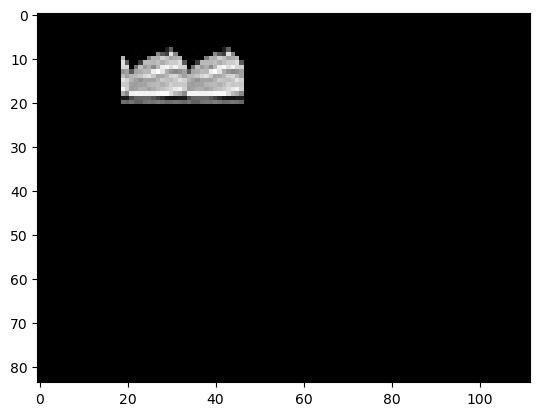

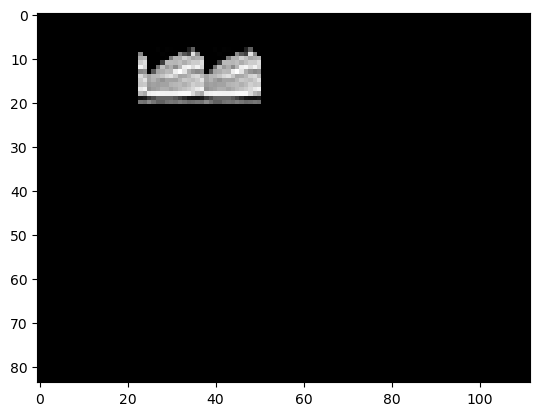

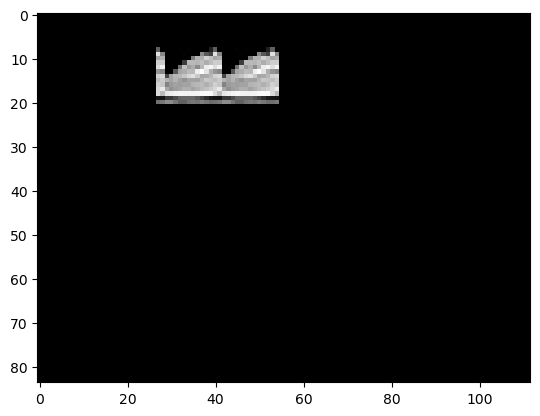

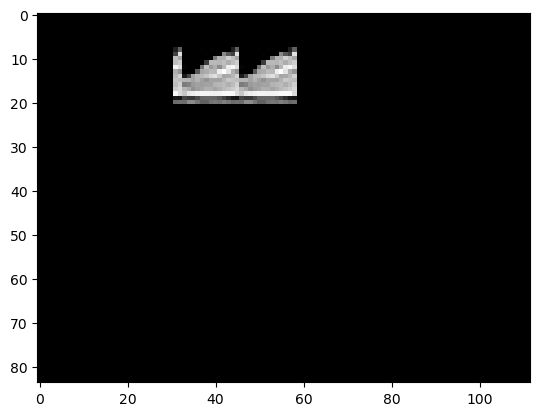

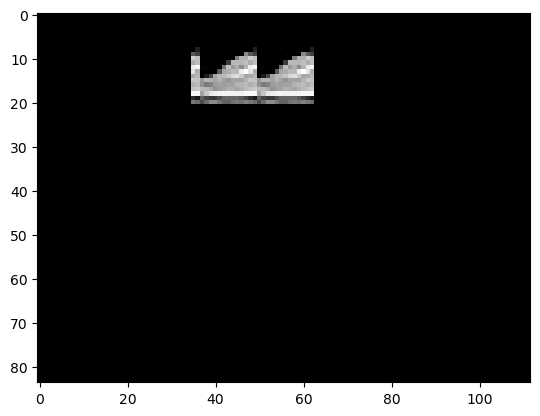

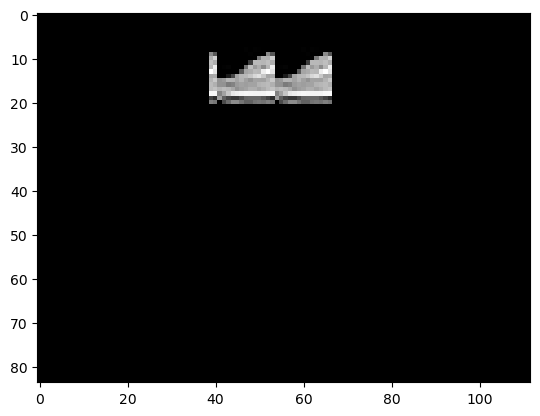

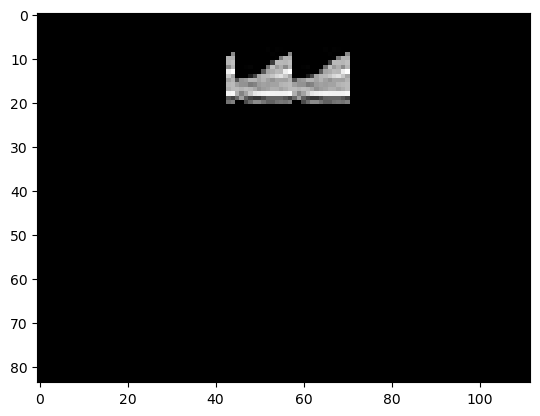

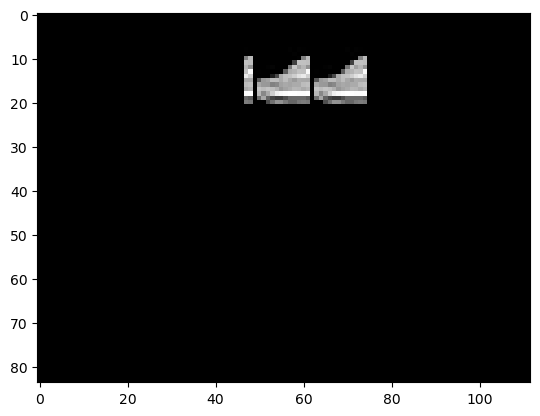

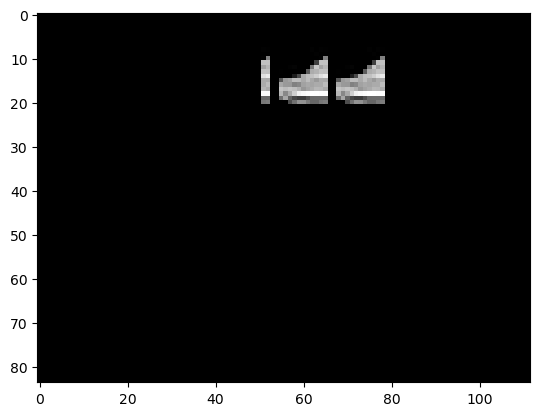

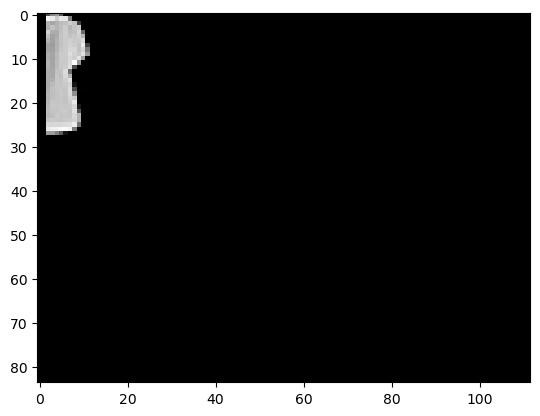

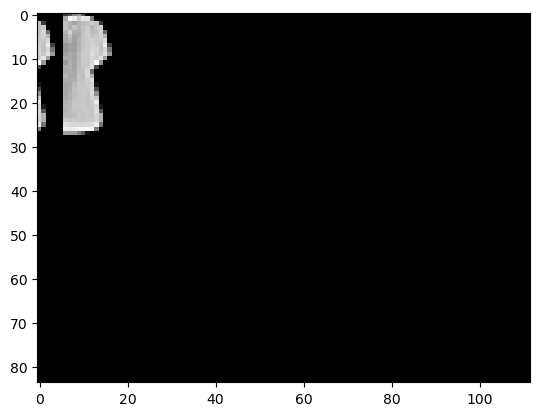

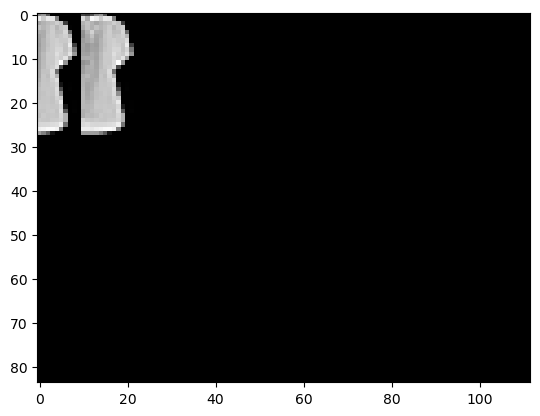

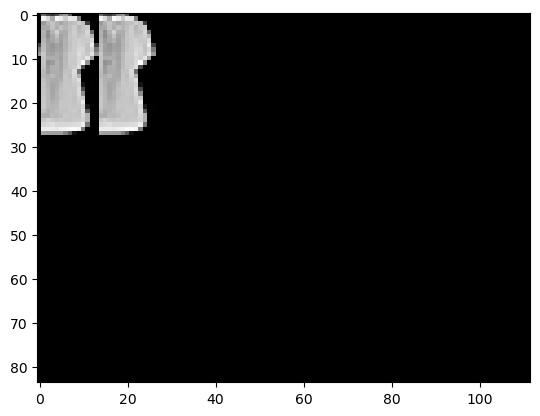

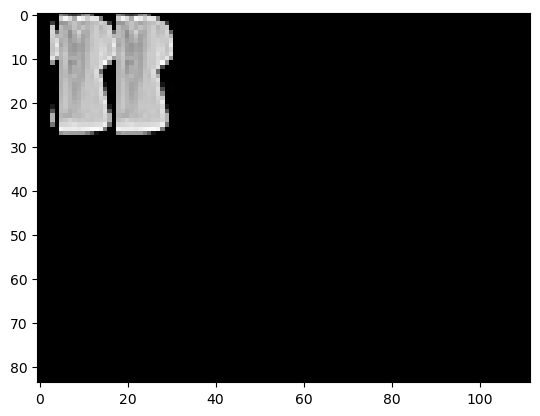

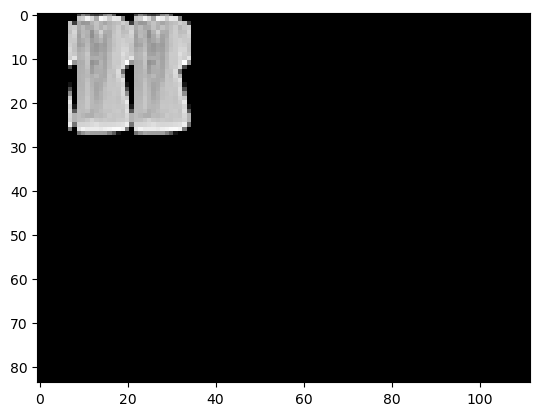

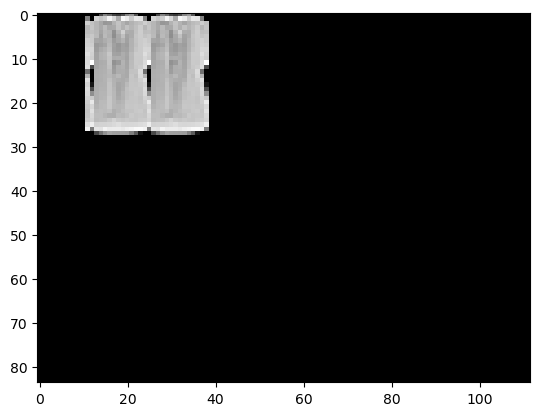

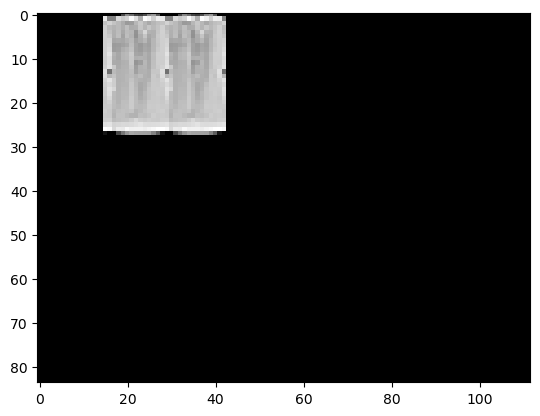

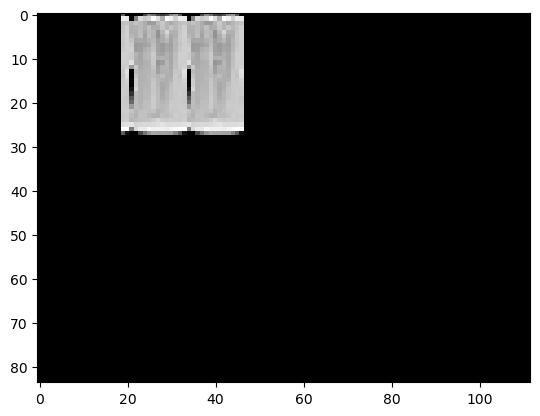

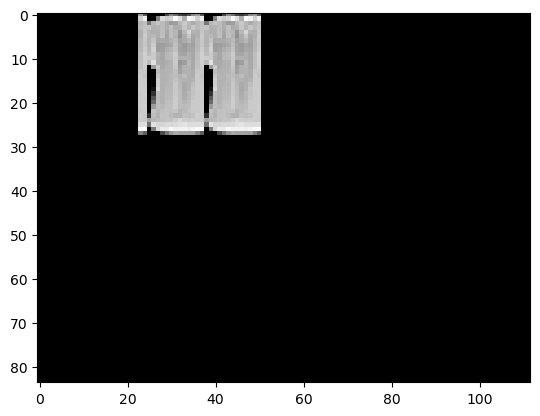

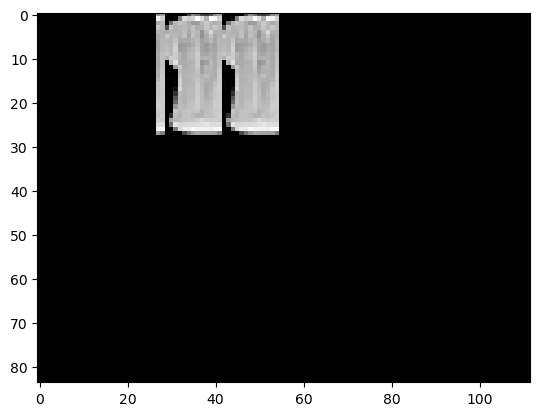

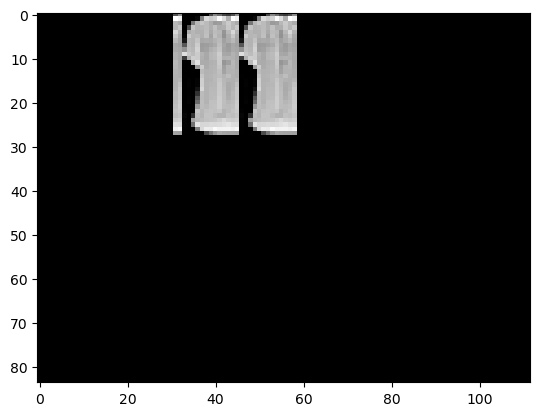

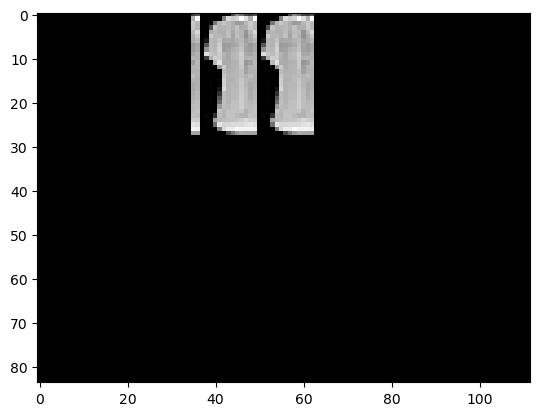

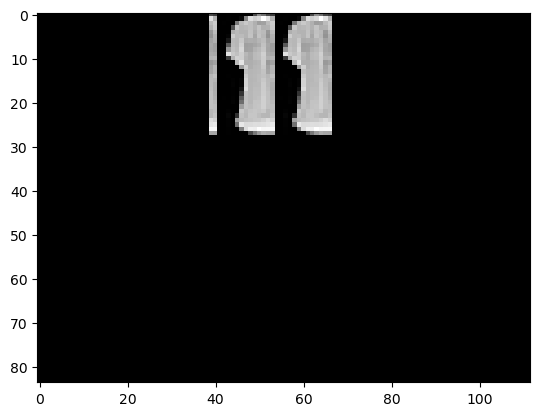

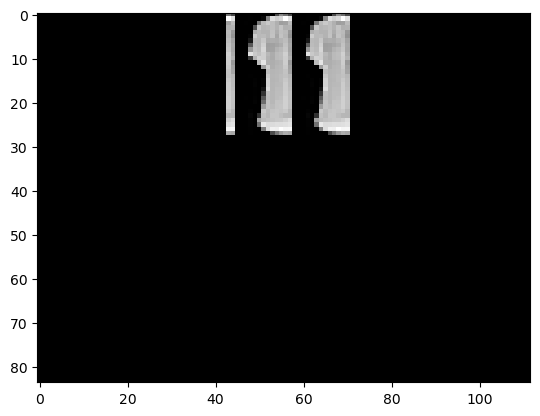

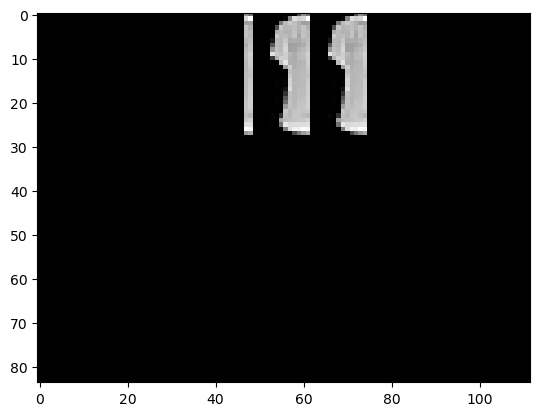

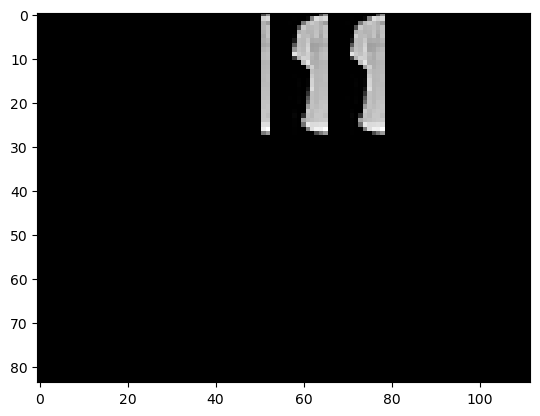

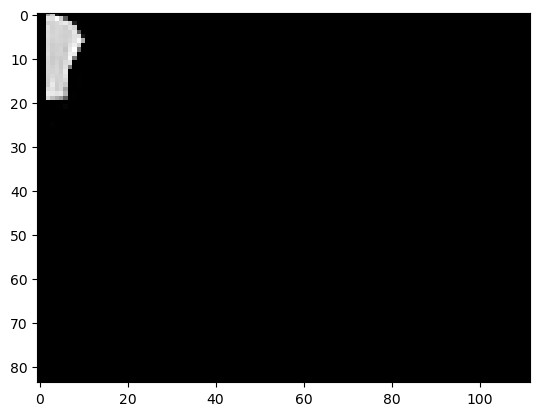

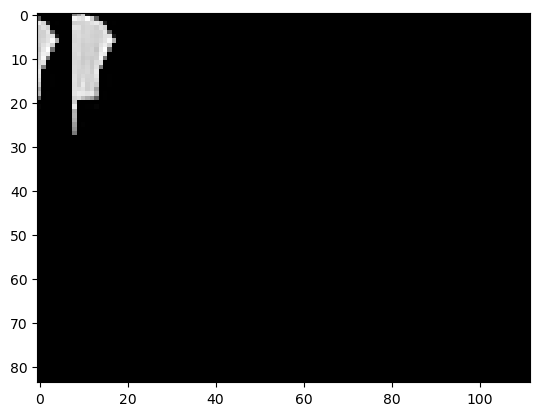

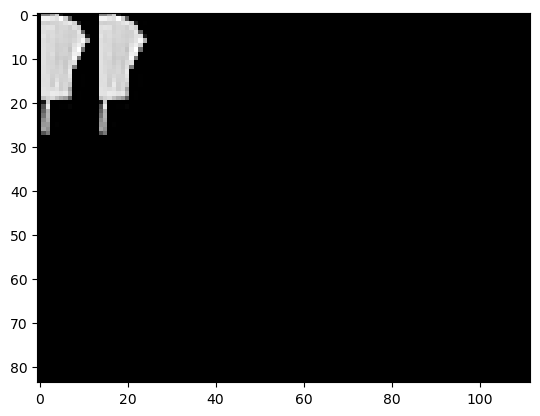

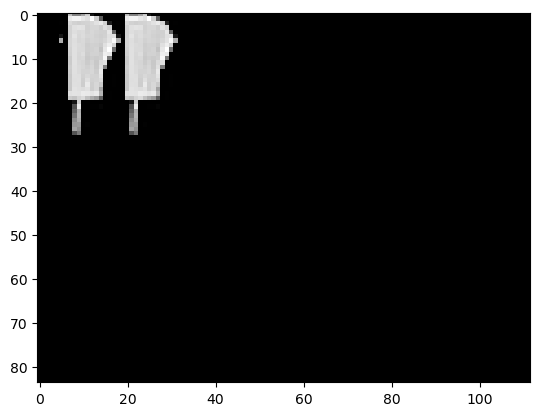

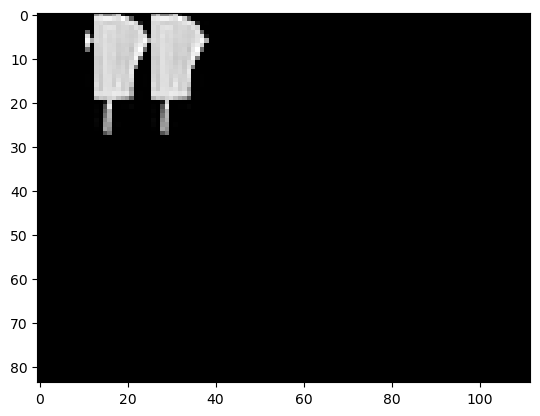

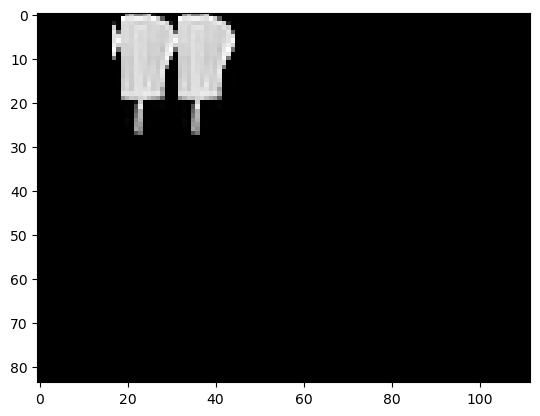

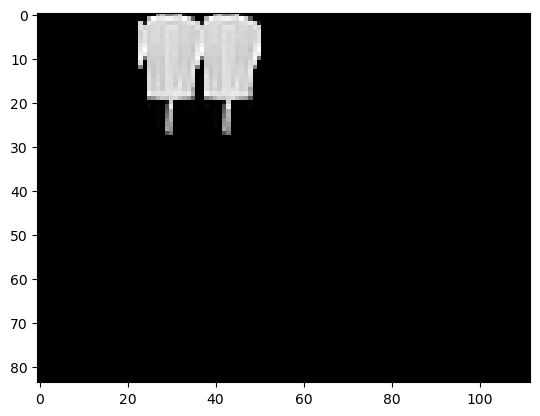

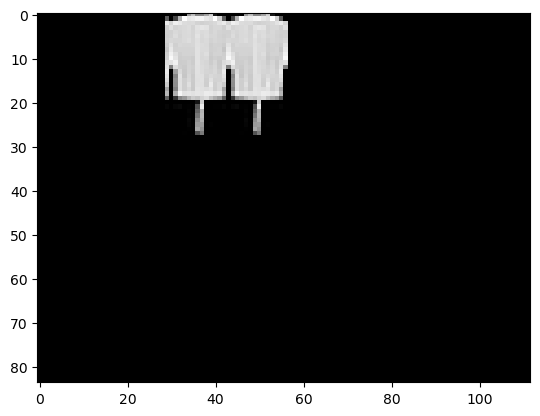

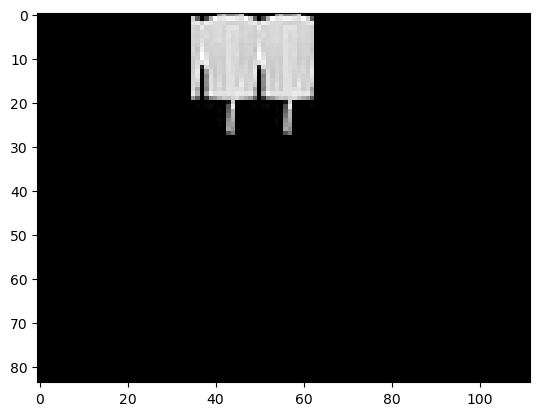

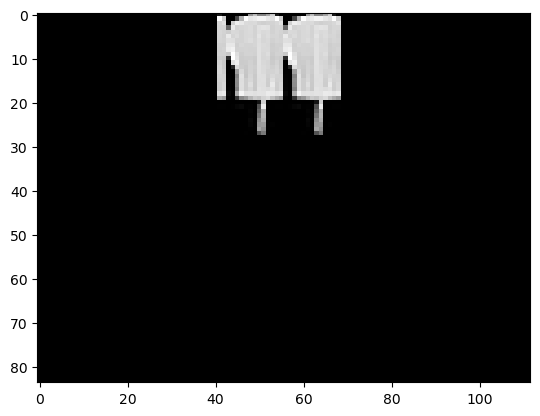

KeyboardInterrupt: 

In [14]:
# view image
for i in range(len(test)):
    plt.imshow(test[i], cmap='gray')
    pause(0.01)

torch.Size([28, 28])
True
torch.Size([84, 112])


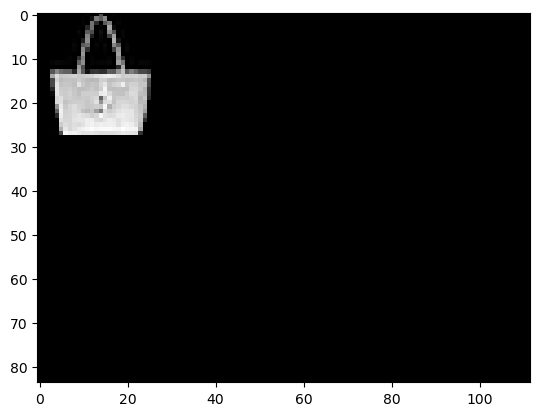

In [102]:
# from torch import is_tensor

# normalization
aug_sample = training_data.data[rand]/255.

# expand and clean
print(aug_sample.size())
aug_sample = aug_sample.repeat(3, 4)
aug_sample[:, 28:] = 0
aug_sample[28:, :] = 0

# print info
print(is_tensor(aug_sample))
print(aug_sample.size())
plt.imshow(aug_sample, cmap='gray')

0
2020
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
